<a href="https://colab.research.google.com/github/Keivanrahmani/KeivanRahmani/blob/Keivanrahmani-Alberta_Industrial/Edmonton_east_2_google_CO_houlry_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import io 
from numpy import array
from numpy import hstack
from statsmodels.tools.eval_measures import mse,rmse,meanabs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import optuna
from optuna.integration import KerasPruningCallback
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import graphviz
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from keras.layers import BatchNormalization
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
import os
from matplotlib import pyplot
from keras.models import load_model
from tensorflow.keras import initializers
from keras.layers import Input, Dense, concatenate, Dropout
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate, Dropout
from tensorflow.keras.utils import plot_model
from keras.models import Model
from tensorflow.keras.utils import plot_model

from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

In [235]:
# pip install keras

In [236]:
# pip install optuna 

In [237]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [238]:
df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_east_beforecovid_NOX_CO_Google_hourly.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True)
df2=pd.read_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_east_aftercovid_NOX_CO_Google_hourly.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True)

In [239]:
# df1.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/DATA_ED_EA_PRECOV_NOX_CO_Google_hourly.csv')
# df2.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/DATA_ED_EA_AFTCOV_NOX_CO_Google_hourly.csv')

In [240]:
# df1 = df1.loc[:'2020-03-11']
# df2

In [241]:
def wind (df, radius):
  dff = df.copy()
  a = 'sin'
  b =  'cos'
  dff[a]=np.sin(dff[radius]*np.pi/180)
  dff[b]=np.cos(dff[radius]*np.pi/180)
  #dff[a] = dff[a] * dff[speed]
  #dff[b] = dff[b] * dff[speed]
  # dff.drop(columns=[radius],inplace = True)
  return dff


def lag_maker(df,column, num):
    for i in  range(num):
        df[column+ '-lag' + str(i+1)] = df[column].shift(i+1)
        df[column+ '-lag' + str(i+1)] = df[column+ '-lag' + str(i+1)]

def lag(df_reg, num):
    for i in c:
        lag_maker(df_reg,i,num)
        
    df_reg = df_reg.iloc[num:]
    return df_reg        


# # df2 = lag(df1,1)
# df1_w = wind(df1, 'Wind Dir (deg)')
# df2_w = wind(df2, 'Wind Dir (deg)')

In [242]:
df2.columns

Index(['CO (ppm)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'NOX (ppm)', 'Wind Direction', 'Wind Speed (km/hr)',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'driving', 'driving pred',
       'driving 0', 'driving 0.5', 'driving 1', 'transit', 'transit pred',
       'transit 0', 'transit 0.5', 'transit 1', 'walking', 'walking pred',
       'walking 0', 'walking 0.5', 'walking 1', 'retail & recreation',
       'retail & recreation pred', 'retail & recreation 0',
       'retail & recreation 0.5', 'retail & recreation 1',
       'grocery & pharmacy', 'grocery & pharmacy pred', 'grocery & pharmacy 0',
       'grocery & pharmacy 0.5', 'grocery & pharmacy 1', 'parks', 'parks pred',
       'parks 0', 'parks 0.5', 'parks 1', 'work places', 'work places pred',
       'work places 0', 'work places 0.5', 'work places 1'],
      dtype='object')

In [243]:
df2

CO (ppm)  T ( C)  ...  work places 0.5  work places 1
Date                                   ...                                
2020-02-15 00:00:00       0.1   -14.8  ...       -21.416355     -37.475140
2020-02-15 01:00:00       0.2   -15.3  ...       -21.416355     -37.475140
2020-02-15 02:00:00       0.1   -15.3  ...       -21.416355     -37.475140
2020-02-15 03:00:00       0.1   -15.4  ...       -21.416355     -37.475140
2020-02-15 04:00:00       0.1   -15.2  ...       -21.416355     -37.475140
...                       ...     ...  ...              ...            ...
2021-04-30 19:00:00       0.1    15.9  ...       -42.619420     -50.325348
2021-04-30 20:00:00       0.2    15.5  ...       -42.619420     -50.325348
2021-04-30 21:00:00       0.2    15.2  ...       -42.619420     -50.325348
2021-04-30 22:00:00       0.1    13.9  ...       -42.619420     -50.325348
2021-04-30 23:00:00       0.1    13.1  ...       -42.619420     -50.325348

[10495 rows x 49 columns]

In [244]:
df1_w= df1[['CO (ppm)',
              # 'NOX (ppm)',
              'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
               'Wind Direction', 'Wind Speed (km/hr)',
              'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
              'dayofweek_num', 'Day-year', 'trend']].copy()

df2_w= df2[['CO (ppm)', 
              # 'NOX (ppm)'
            'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
            'Wind Direction', 'Wind Speed (km/hr)',
            'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
            'dayofweek_num', 'Day-year', 'trend', 
            'driving',
            'transit', 
            #  'walking',  
            'retail & recreation',
            'grocery & pharmacy',
            'parks',
            'work places'
       ]].copy()

In [245]:
df2_w.head()

CO (ppm)  T ( C)  ...  parks  work places
Date                                   ...                    
2020-02-15 00:00:00       0.1   -14.8  ...   18.0         -2.0
2020-02-15 01:00:00       0.2   -15.3  ...   18.0         -2.0
2020-02-15 02:00:00       0.1   -15.3  ...   18.0         -2.0
2020-02-15 03:00:00       0.1   -15.4  ...   18.0         -2.0
2020-02-15 04:00:00       0.1   -15.2  ...   18.0         -2.0

[5 rows x 19 columns]

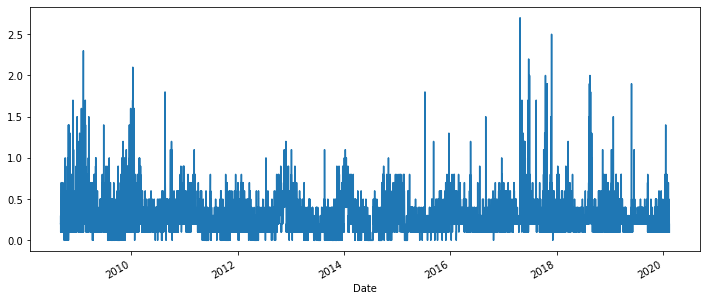

In [246]:
df1_w['CO (ppm)'].plot(figsize = (12,5))

In [247]:
df1_w['CO (ppm)'][df1_w['CO (ppm)']>2.3]

Date
2017-04-24 21:00:00    2.7
2017-11-27 10:00:00    2.5
Name: CO (ppm), dtype: float64

In [248]:
df1_w['CO (ppm)'][df1_w['CO (ppm)']>2.3]= np.nan
df1_w.dropna(inplace = True)
df1_w.isna().sum()

CO (ppm)                       0
T ( C)                         0
RH %                           0
Std. Dev. of Wind Direction    0
Wind Direction                 0
Wind Speed (km/hr)             0
Incoming Solar Rad. (W/m2)     0
Precip. (mm)                   0
hol                            0
hour                           0
dayofweek_num                  0
Day-year                       0
trend                          0
dtype: int64

In [249]:
df1_w

CO (ppm)  T ( C)  RH %  ...  dayofweek_num  Day-year      trend
Date                                         ...                                    
2008-09-01 00:00:00       0.2     7.3  85.0  ...            0.0     245.0   8.666667
2008-09-01 01:00:00       0.2     6.7  88.0  ...            0.0     245.0   8.666781
2008-09-01 02:00:00       0.2     6.0  90.0  ...            0.0     245.0   8.666894
2008-09-01 03:00:00       0.2     5.7  91.0  ...            0.0     245.0   8.667008
2008-09-01 04:00:00       0.2     5.1  93.0  ...            0.0     245.0   8.667122
...                       ...     ...   ...  ...            ...       ...        ...
2020-02-14 19:00:00       0.2   -12.2  70.0  ...            4.0      45.0  20.122382
2020-02-14 20:00:00       0.2   -12.3  66.0  ...            4.0      45.0  20.122495
2020-02-14 21:00:00       0.2   -12.9  66.0  ...            4.0      45.0  20.122609
2020-02-14 22:00:00       0.2   -13.7  66.0  ...            4.0      45.0  20.122723
2020-02-14 23:00:00       0.1   -14.1  67.0  ...            4.0      45.0  20.122837

[97885 rows x 13 columns]

In [250]:
df1_w.columns

Index(['CO (ppm)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Wind Direction', 'Wind Speed (km/hr)', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend'],
      dtype='object')

In [251]:
aa = 'CO (ppm)'

In [252]:
Y = df1_w[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w[df1_w.columns[1:]])

maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [253]:
2>= 2

True

In [227]:
class Objective(object):
    def __init__(self, X, Y_scaler, max_epochs, learn_rate_epochs,
                  ):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, Y_scaler, test_size=0.001, random_state=42)
        # self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_train, self.y_train, test_size=0.11, random_state=42)
        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs
        self.n_features = np.shape(self.X_train)[1]

    def __call__(self, trial):        
        dict_params = {
                        'layers': trial.suggest_int('layers', 2,4),
                        # 'alpha': trial.suggest_float(  'alpha',0.01, 0.9),
                        # 'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,5000,500)),
                        'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 20,40),
                        # 'delta': trial.suggest_float(  'delta',40, 100),
                      #  'learning_rate': trial.suggest_float(  'learning_rate',0.001, 0.1),
                       'drop_out1': trial.suggest_float('drop_out1',0.1, 0.3)}  
        # if dict_params['layers']  >= 2:
        dict_params['num_dense_nodes2'] = trial.suggest_int('num_dense_nodes2', 5,40)
        # dict_params['drop_out2'] =trial.suggest_float('drop_out2',0.1, 0.3)

        if dict_params['layers']  >= 3:
            dict_params['num_dense_nodes3'] = trial.suggest_int('num_dense_nodes3', 5,30)
            # dict_params['drop_out3'] = trial.suggest_float('drop_out3',0.1, 0.3)

        if dict_params['layers']  == 4:
            dict_params['num_dense_nodes4'] = trial.suggest_int('num_dense_nodes4', 5,20)
            # dict_params['drop_out4'] = trial.suggest_float('drop_out4',0.1, 0.3)

        dict_params['learning_rate']=0.1
        dict_params['alpha']=0.05
        dict_params['batchsize']=2500

          
        model = Sequential()
        model.add(BatchNormalization())
        model.add(Dense(dict_params['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha= dict_params[ 'alpha'])) 
        model.add(Dropout(dict_params['drop_out1']))
        # if dict_params['layers'] >=2 :
        model.add(Dense(dict_params['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
        model.add(Dropout(dict_params['drop_out1']))
        if dict_params['layers'] >= 3 :
            model.add(Dense(dict_params['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
            model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
            model.add(Dropout(dict_params['drop_out1']))
        if dict_params['layers'] == 4 :
            model.add(Dense(dict_params['num_dense_nodes4'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
            model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 
            model.add(Dropout(dict_params['drop_out1']))
        model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params[ 'alpha'])) 

        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params[ 'learning_rate'])
        model.compile(loss='mse',optimizer=opt)
        fn = "gdrive/My Drive/Colab Notebooks/Stations/ED_EA_GOG_H_CO" +str(trial.number) + ".ckpt" 
        fnn = os.path.dirname(fn)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]

        n_f = 4
        kf = KFold(n_splits=n_f )
        acc = 0 
        for train_index, test_index in kf.split( self.X_train):   
                X_tr, X_tes =  self.X_train[train_index],  self.X_train[test_index]
                y_tr, y_tes =   self.y_train[train_index],   self.y_train[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state = 42)
                h = model.fit(x=X_tra, y=y_tra,
                                  validation_data=(X_val, y_val),
                                  batch_size=dict_params['batchsize'],
                                  epochs=self.max_epochs,
                                  shuffle=True, verbose=0,
                                  callbacks=callbacks_list)
                model.load_weights(fn)
                preds = model.predict(X_tes)
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 

        print(acc)
        return acc    

In [ ]:
# objective = Objective(X,Y,maximum_epochs,learning_rate_epochs)
# study = optuna.create_study(direction=optimizer_direction, study_name='east___ed___CO', storage='sqlite:///east___ed___CO.db',
#                             load_if_exists=True)
# study.optimize(objective, n_trials=500)
# df_results = study.trials_dataframe()
# # df_results.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/CO_Edmonton_East_Hyperparams_prevovid.csv')
# df_results.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/CO_Edmonton_East_Hyperparams_prevovid_4layers.csv')
# #df_results.to_pickle('Desktop\heel\df_optuna_results.pkl')

[I 2021-06-12 19:43:49,986] A new study created in RDB with name: east___ed___CO
[I 2021-06-12 19:44:55,214] Trial 0 finished with value: 0.012959059550107283 and parameters: {'layers': 3, 'num_dense_nodes1': 24, 'drop_out1': 0.12137549034209401, 'num_dense_nodes2': 37, 'num_dense_nodes3': 30}. Best is trial 0 with value: 0.012959059550107283.


0.012959059550107283


[I 2021-06-12 19:45:58,050] Trial 1 finished with value: 0.014422387096208992 and parameters: {'layers': 2, 'num_dense_nodes1': 20, 'drop_out1': 0.18059274064557143, 'num_dense_nodes2': 11}. Best is trial 0 with value: 0.012959059550107283.


0.014422387096208992


[I 2021-06-12 19:47:02,982] Trial 2 finished with value: 0.014012836809422217 and parameters: {'layers': 2, 'num_dense_nodes1': 24, 'drop_out1': 0.1309125234401414, 'num_dense_nodes2': 22}. Best is trial 0 with value: 0.012959059550107283.


0.014012836809422217


[I 2021-06-12 19:48:06,689] Trial 3 finished with value: 0.014167988876085513 and parameters: {'layers': 2, 'num_dense_nodes1': 34, 'drop_out1': 0.2215812748490148, 'num_dense_nodes2': 7}. Best is trial 0 with value: 0.012959059550107283.


0.014167988876085513


[I 2021-06-12 19:49:13,331] Trial 4 finished with value: 0.013839707200226672 and parameters: {'layers': 3, 'num_dense_nodes1': 21, 'drop_out1': 0.13432543691468446, 'num_dense_nodes2': 17, 'num_dense_nodes3': 29}. Best is trial 0 with value: 0.012959059550107283.


0.013839707200226672


[I 2021-06-12 19:50:15,026] Trial 5 finished with value: 0.014297582323996137 and parameters: {'layers': 2, 'num_dense_nodes1': 38, 'drop_out1': 0.2642624428963796, 'num_dense_nodes2': 15}. Best is trial 0 with value: 0.012959059550107283.


0.014297582323996137


[I 2021-06-12 19:51:16,533] Trial 6 finished with value: 0.014522912835161154 and parameters: {'layers': 2, 'num_dense_nodes1': 24, 'drop_out1': 0.17666194888047707, 'num_dense_nodes2': 19}. Best is trial 0 with value: 0.012959059550107283.


0.014522912835161154


[I 2021-06-12 19:52:22,667] Trial 7 finished with value: 0.01409326591893922 and parameters: {'layers': 3, 'num_dense_nodes1': 27, 'drop_out1': 0.28926933451729775, 'num_dense_nodes2': 32, 'num_dense_nodes3': 23}. Best is trial 0 with value: 0.012959059550107283.


0.01409326591893922


[I 2021-06-12 19:53:30,938] Trial 8 finished with value: 0.012715075793325648 and parameters: {'layers': 3, 'num_dense_nodes1': 26, 'drop_out1': 0.11917339222036966, 'num_dense_nodes2': 28, 'num_dense_nodes3': 9}. Best is trial 8 with value: 0.012715075793325648.


0.012715075793325648


[I 2021-06-12 19:54:39,289] Trial 9 finished with value: 0.014732677218056153 and parameters: {'layers': 4, 'num_dense_nodes1': 20, 'drop_out1': 0.2732625660569154, 'num_dense_nodes2': 16, 'num_dense_nodes3': 28, 'num_dense_nodes4': 8}. Best is trial 8 with value: 0.012715075793325648.


0.014732677218056153


[I 2021-06-12 19:55:47,983] Trial 10 finished with value: 0.013412634496074844 and parameters: {'layers': 4, 'num_dense_nodes1': 32, 'drop_out1': 0.21830927964135688, 'num_dense_nodes2': 29, 'num_dense_nodes3': 5, 'num_dense_nodes4': 20}. Best is trial 8 with value: 0.012715075793325648.


0.013412634496074844


[I 2021-06-12 19:56:56,455] Trial 11 finished with value: 0.013355102652652329 and parameters: {'layers': 3, 'num_dense_nodes1': 28, 'drop_out1': 0.10038569454257537, 'num_dense_nodes2': 39, 'num_dense_nodes3': 9}. Best is trial 8 with value: 0.012715075793325648.


0.013355102652652329


[I 2021-06-12 19:58:01,772] Trial 12 finished with value: 0.012703433396123943 and parameters: {'layers': 3, 'num_dense_nodes1': 25, 'drop_out1': 0.10333490022581553, 'num_dense_nodes2': 38, 'num_dense_nodes3': 14}. Best is trial 12 with value: 0.012703433396123943.


0.012703433396123943


[I 2021-06-12 19:59:09,244] Trial 13 finished with value: 0.01301323669214508 and parameters: {'layers': 4, 'num_dense_nodes1': 29, 'drop_out1': 0.10392178905635796, 'num_dense_nodes2': 30, 'num_dense_nodes3': 14, 'num_dense_nodes4': 19}. Best is trial 12 with value: 0.012703433396123943.


0.01301323669214508


[I 2021-06-12 20:00:14,413] Trial 14 finished with value: 0.01319596793044493 and parameters: {'layers': 3, 'num_dense_nodes1': 26, 'drop_out1': 0.15597330356620726, 'num_dense_nodes2': 35, 'num_dense_nodes3': 14}. Best is trial 12 with value: 0.012703433396123943.


0.01319596793044493


[I 2021-06-12 20:01:20,431] Trial 15 finished with value: 0.012724326352574136 and parameters: {'layers': 3, 'num_dense_nodes1': 31, 'drop_out1': 0.10175501688417031, 'num_dense_nodes2': 25, 'num_dense_nodes3': 9}. Best is trial 12 with value: 0.012703433396123943.


0.012724326352574136


[I 2021-06-12 20:02:29,656] Trial 16 finished with value: 0.01353360481081123 and parameters: {'layers': 4, 'num_dense_nodes1': 22, 'drop_out1': 0.1491512128193792, 'num_dense_nodes2': 40, 'num_dense_nodes3': 19, 'num_dense_nodes4': 5}. Best is trial 12 with value: 0.012703433396123943.


0.01353360481081123


[I 2021-06-12 20:03:35,157] Trial 17 finished with value: 0.012593240581272556 and parameters: {'layers': 3, 'num_dense_nodes1': 34, 'drop_out1': 0.1116895828297203, 'num_dense_nodes2': 25, 'num_dense_nodes3': 5}. Best is trial 17 with value: 0.012593240581272556.


0.012593240581272556


[I 2021-06-12 20:04:41,185] Trial 18 finished with value: 0.012729455592304392 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1650298794143203, 'num_dense_nodes2': 34, 'num_dense_nodes3': 5}. Best is trial 17 with value: 0.012593240581272556.


0.012729455592304392


[I 2021-06-12 20:05:50,040] Trial 19 finished with value: 0.013237608151878012 and parameters: {'layers': 4, 'num_dense_nodes1': 36, 'drop_out1': 0.1949815551354408, 'num_dense_nodes2': 23, 'num_dense_nodes3': 15, 'num_dense_nodes4': 14}. Best is trial 17 with value: 0.012593240581272556.


0.013237608151878012


[I 2021-06-12 20:06:54,789] Trial 20 finished with value: 0.015170119379017927 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.24202854217716693, 'num_dense_nodes2': 26, 'num_dense_nodes3': 20}. Best is trial 17 with value: 0.012593240581272556.


0.015170119379017927


[I 2021-06-12 20:08:03,004] Trial 21 finished with value: 0.011732737405808042 and parameters: {'layers': 3, 'num_dense_nodes1': 33, 'drop_out1': 0.11288646623366924, 'num_dense_nodes2': 27, 'num_dense_nodes3': 9}. Best is trial 21 with value: 0.011732737405808042.


0.011732737405808042


[I 2021-06-12 20:09:09,591] Trial 22 finished with value: 0.012892030563604665 and parameters: {'layers': 3, 'num_dense_nodes1': 33, 'drop_out1': 0.11220261607689529, 'num_dense_nodes2': 21, 'num_dense_nodes3': 11}. Best is trial 21 with value: 0.011732737405808042.


0.012892030563604665


[I 2021-06-12 20:10:14,109] Trial 23 finished with value: 0.014303338555813698 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.1467165647193517, 'num_dense_nodes2': 26, 'num_dense_nodes3': 6}. Best is trial 21 with value: 0.011732737405808042.


0.014303338555813698


[I 2021-06-12 20:11:21,707] Trial 24 finished with value: 0.012551187503928774 and parameters: {'layers': 3, 'num_dense_nodes1': 30, 'drop_out1': 0.132597168039126, 'num_dense_nodes2': 32, 'num_dense_nodes3': 11}. Best is trial 21 with value: 0.011732737405808042.


0.012551187503928774


[I 2021-06-12 20:12:29,160] Trial 25 finished with value: 0.012455429295359739 and parameters: {'layers': 3, 'num_dense_nodes1': 30, 'drop_out1': 0.12931001627108055, 'num_dense_nodes2': 32, 'num_dense_nodes3': 7}. Best is trial 21 with value: 0.011732737405808042.


0.012455429295359739


[I 2021-06-12 20:13:32,652] Trial 26 finished with value: 0.012938716965551038 and parameters: {'layers': 2, 'num_dense_nodes1': 30, 'drop_out1': 0.13543811688931195, 'num_dense_nodes2': 32}. Best is trial 21 with value: 0.011732737405808042.


0.012938716965551038


[I 2021-06-12 20:14:41,862] Trial 27 finished with value: 0.013486019215976457 and parameters: {'layers': 4, 'num_dense_nodes1': 31, 'drop_out1': 0.16402715521307873, 'num_dense_nodes2': 32, 'num_dense_nodes3': 10, 'num_dense_nodes4': 13}. Best is trial 21 with value: 0.011732737405808042.


0.013486019215976457


[I 2021-06-12 20:15:47,579] Trial 28 finished with value: 0.012753355381930459 and parameters: {'layers': 3, 'num_dense_nodes1': 29, 'drop_out1': 0.14060691657222063, 'num_dense_nodes2': 35, 'num_dense_nodes3': 7}. Best is trial 21 with value: 0.011732737405808042.


0.012753355381930459


[I 2021-06-12 20:16:54,688] Trial 29 finished with value: 0.012650403618962448 and parameters: {'layers': 3, 'num_dense_nodes1': 32, 'drop_out1': 0.12374783678214442, 'num_dense_nodes2': 36, 'num_dense_nodes3': 7}. Best is trial 21 with value: 0.011732737405808042.


0.012650403618962448


[I 2021-06-12 20:18:05,669] Trial 30 finished with value: 0.01257944097287692 and parameters: {'layers': 3, 'num_dense_nodes1': 30, 'drop_out1': 0.12295855671887525, 'num_dense_nodes2': 28, 'num_dense_nodes3': 12}. Best is trial 21 with value: 0.011732737405808042.


0.01257944097287692


[I 2021-06-12 20:19:13,826] Trial 31 finished with value: 0.012090798960250084 and parameters: {'layers': 3, 'num_dense_nodes1': 29, 'drop_out1': 0.1231906466499384, 'num_dense_nodes2': 28, 'num_dense_nodes3': 12}. Best is trial 21 with value: 0.011732737405808042.


0.012090798960250084


[I 2021-06-12 20:20:21,556] Trial 32 finished with value: 0.012436001569257537 and parameters: {'layers': 3, 'num_dense_nodes1': 28, 'drop_out1': 0.11648033130927822, 'num_dense_nodes2': 31, 'num_dense_nodes3': 12}. Best is trial 21 with value: 0.011732737405808042.


0.012436001569257537


[I 2021-06-12 20:21:26,445] Trial 33 finished with value: 0.012806546083876696 and parameters: {'layers': 3, 'num_dense_nodes1': 28, 'drop_out1': 0.11718456110492312, 'num_dense_nodes2': 31, 'num_dense_nodes3': 17}. Best is trial 21 with value: 0.011732737405808042.


0.012806546083876696


[I 2021-06-12 20:22:30,476] Trial 34 finished with value: 0.013241277576050849 and parameters: {'layers': 2, 'num_dense_nodes1': 28, 'drop_out1': 0.17965684652681435, 'num_dense_nodes2': 28}. Best is trial 21 with value: 0.011732737405808042.


0.013241277576050849


[I 2021-06-12 20:23:38,933] Trial 35 finished with value: 0.012404753551291722 and parameters: {'layers': 3, 'num_dense_nodes1': 32, 'drop_out1': 0.1291641294499464, 'num_dense_nodes2': 23, 'num_dense_nodes3': 13}. Best is trial 21 with value: 0.011732737405808042.


0.012404753551291722


[I 2021-06-12 20:24:47,347] Trial 36 finished with value: 0.0127597179701179 and parameters: {'layers': 3, 'num_dense_nodes1': 34, 'drop_out1': 0.16088550774597354, 'num_dense_nodes2': 23, 'num_dense_nodes3': 12}. Best is trial 21 with value: 0.011732737405808042.


0.0127597179701179


[I 2021-06-12 20:25:51,426] Trial 37 finished with value: 0.013723400269088283 and parameters: {'layers': 2, 'num_dense_nodes1': 32, 'drop_out1': 0.11158683639051023, 'num_dense_nodes2': 20}. Best is trial 21 with value: 0.011732737405808042.


0.013723400269088283


[I 2021-06-12 20:26:58,318] Trial 38 finished with value: 0.012682974333129877 and parameters: {'layers': 3, 'num_dense_nodes1': 33, 'drop_out1': 0.1443147322038051, 'num_dense_nodes2': 24, 'num_dense_nodes3': 16}. Best is trial 21 with value: 0.011732737405808042.


0.012682974333129877


[I 2021-06-12 20:28:01,452] Trial 39 finished with value: 0.013554260821684686 and parameters: {'layers': 2, 'num_dense_nodes1': 23, 'drop_out1': 0.19746351445226268, 'num_dense_nodes2': 26}. Best is trial 21 with value: 0.011732737405808042.


0.013554260821684686


[I 2021-06-12 20:29:07,039] Trial 40 finished with value: 0.013165944753792156 and parameters: {'layers': 3, 'num_dense_nodes1': 27, 'drop_out1': 0.17025529784476928, 'num_dense_nodes2': 12, 'num_dense_nodes3': 13}. Best is trial 21 with value: 0.011732737405808042.


0.013165944753792156


[I 2021-06-12 20:30:13,578] Trial 41 finished with value: 0.012640613619676664 and parameters: {'layers': 3, 'num_dense_nodes1': 31, 'drop_out1': 0.12625240799315093, 'num_dense_nodes2': 29, 'num_dense_nodes3': 8}. Best is trial 21 with value: 0.011732737405808042.


0.012640613619676664


[I 2021-06-12 20:31:20,334] Trial 42 finished with value: 0.01310401571831413 and parameters: {'layers': 3, 'num_dense_nodes1': 29, 'drop_out1': 0.13283607107303988, 'num_dense_nodes2': 18, 'num_dense_nodes3': 10}. Best is trial 21 with value: 0.011732737405808042.


0.01310401571831413


[I 2021-06-12 20:32:29,127] Trial 43 finished with value: 0.01239798989012354 and parameters: {'layers': 3, 'num_dense_nodes1': 33, 'drop_out1': 0.15222026232475572, 'num_dense_nodes2': 34, 'num_dense_nodes3': 11}. Best is trial 21 with value: 0.011732737405808042.


0.01239798989012354


[I 2021-06-12 20:33:37,675] Trial 44 finished with value: 0.012512698203805099 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.1504103151098253, 'num_dense_nodes2': 34, 'num_dense_nodes3': 12}. Best is trial 21 with value: 0.011732737405808042.


0.012512698203805099


[I 2021-06-12 20:34:45,489] Trial 45 finished with value: 0.01240733884290517 and parameters: {'layers': 3, 'num_dense_nodes1': 33, 'drop_out1': 0.11046719835038976, 'num_dense_nodes2': 27, 'num_dense_nodes3': 16}. Best is trial 21 with value: 0.011732737405808042.


0.01240733884290517


[I 2021-06-12 20:35:56,504] Trial 46 finished with value: 0.012238934481545241 and parameters: {'layers': 3, 'num_dense_nodes1': 33, 'drop_out1': 0.10701565587615906, 'num_dense_nodes2': 21, 'num_dense_nodes3': 16}. Best is trial 21 with value: 0.011732737405808042.


0.012238934481545241


[I 2021-06-12 20:37:02,633] Trial 47 finished with value: 0.01344320903610423 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10044973355519264, 'num_dense_nodes2': 19, 'num_dense_nodes3': 21}. Best is trial 21 with value: 0.011732737405808042.


0.01344320903610423


[I 2021-06-12 20:38:08,730] Trial 48 finished with value: 0.014600188215481005 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.13860843282296748, 'num_dense_nodes2': 14, 'num_dense_nodes3': 18}. Best is trial 21 with value: 0.011732737405808042.


0.014600188215481005


[I 2021-06-12 20:39:15,600] Trial 49 finished with value: 0.01468648843063436 and parameters: {'layers': 3, 'num_dense_nodes1': 32, 'drop_out1': 0.2117571920069139, 'num_dense_nodes2': 22, 'num_dense_nodes3': 26}. Best is trial 21 with value: 0.011732737405808042.


0.01468648843063436


[I 2021-06-12 20:40:25,095] Trial 50 finished with value: 0.013419929726266901 and parameters: {'layers': 4, 'num_dense_nodes1': 33, 'drop_out1': 0.1540404839937831, 'num_dense_nodes2': 7, 'num_dense_nodes3': 15, 'num_dense_nodes4': 7}. Best is trial 21 with value: 0.011732737405808042.


0.013419929726266901


[I 2021-06-12 20:41:36,605] Trial 51 finished with value: 0.011918219705553125 and parameters: {'layers': 3, 'num_dense_nodes1': 33, 'drop_out1': 0.10641180191925799, 'num_dense_nodes2': 27, 'num_dense_nodes3': 16}. Best is trial 21 with value: 0.011732737405808042.


0.011918219705553125


[I 2021-06-12 20:42:48,436] Trial 52 finished with value: 0.01200214184550321 and parameters: {'layers': 3, 'num_dense_nodes1': 34, 'drop_out1': 0.1068794944406334, 'num_dense_nodes2': 21, 'num_dense_nodes3': 14}. Best is trial 21 with value: 0.011732737405808042.


0.01200214184550321


[I 2021-06-12 20:44:00,127] Trial 53 finished with value: 0.012342498083877568 and parameters: {'layers': 3, 'num_dense_nodes1': 34, 'drop_out1': 0.10429389683681456, 'num_dense_nodes2': 17, 'num_dense_nodes3': 16}. Best is trial 21 with value: 0.011732737405808042.


0.012342498083877568


[I 2021-06-12 20:45:12,369] Trial 54 finished with value: 0.01249599747273778 and parameters: {'layers': 3, 'num_dense_nodes1': 34, 'drop_out1': 0.10523105329365642, 'num_dense_nodes2': 21, 'num_dense_nodes3': 17}. Best is trial 21 with value: 0.011732737405808042.


0.01249599747273778


[I 2021-06-12 20:46:21,369] Trial 55 finished with value: 0.012321764758301526 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10716294828416299, 'num_dense_nodes2': 16, 'num_dense_nodes3': 15}. Best is trial 21 with value: 0.011732737405808042.


0.012321764758301526


[I 2021-06-12 20:47:29,074] Trial 56 finished with value: 0.01236016901988815 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10070498968811412, 'num_dense_nodes2': 15, 'num_dense_nodes3': 14}. Best is trial 21 with value: 0.011732737405808042.


0.01236016901988815


[I 2021-06-12 20:48:39,259] Trial 57 finished with value: 0.012571645115193014 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11809592692836175, 'num_dense_nodes2': 9, 'num_dense_nodes3': 18}. Best is trial 21 with value: 0.011732737405808042.


0.012571645115193014


[I 2021-06-12 20:49:50,302] Trial 58 finished with value: 0.011462178740811192 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11031639184232767, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.011462178740811192


[I 2021-06-12 20:50:56,148] Trial 59 finished with value: 0.013457937147953406 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.12104219322480356, 'num_dense_nodes2': 25, 'num_dense_nodes3': 20}. Best is trial 58 with value: 0.011462178740811192.


0.013457937147953406


[I 2021-06-12 20:52:03,918] Trial 60 finished with value: 0.013304017924298377 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.29779995936191905, 'num_dense_nodes2': 24, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.013304017924298377


[I 2021-06-12 20:53:13,042] Trial 61 finished with value: 0.012249062957181247 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10914038797997874, 'num_dense_nodes2': 21, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.012249062957181247


[I 2021-06-12 20:54:23,746] Trial 62 finished with value: 0.012005075037731187 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11304651605685699, 'num_dense_nodes2': 21, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.012005075037731187


[I 2021-06-12 20:55:30,106] Trial 63 finished with value: 0.013103726809328194 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.1184757432917554, 'num_dense_nodes2': 27, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.013103726809328194


[I 2021-06-12 20:56:43,042] Trial 64 finished with value: 0.011880363144189632 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10116081934096112, 'num_dense_nodes2': 19, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.011880363144189632


[I 2021-06-12 20:57:52,281] Trial 65 finished with value: 0.012217449522814635 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1003283889469209, 'num_dense_nodes2': 19, 'num_dense_nodes3': 10}. Best is trial 58 with value: 0.011462178740811192.


0.012217449522814635


[I 2021-06-12 20:58:56,356] Trial 66 finished with value: 0.015068119304865329 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.24038518812290607, 'num_dense_nodes2': 29, 'num_dense_nodes3': 19}. Best is trial 58 with value: 0.011462178740811192.


0.015068119304865329


[I 2021-06-12 21:00:07,468] Trial 67 finished with value: 0.0117037232658809 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.1139646622486492, 'num_dense_nodes2': 24, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.0117037232658809


[I 2021-06-12 21:01:17,441] Trial 68 finished with value: 0.01194895088154496 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11511420291901804, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.01194895088154496


[I 2021-06-12 21:02:23,390] Trial 69 finished with value: 0.013017714591116615 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1145954260695593, 'num_dense_nodes2': 25, 'num_dense_nodes3': 17}. Best is trial 58 with value: 0.011462178740811192.


0.013017714591116615


[I 2021-06-12 21:03:35,392] Trial 70 finished with value: 0.011466773260196647 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10007872171814075, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.011466773260196647


[I 2021-06-12 21:04:48,453] Trial 71 finished with value: 0.012462318580841153 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10012454842286271, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.012462318580841153


[I 2021-06-12 21:05:59,414] Trial 72 finished with value: 0.012259181500526007 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.1281020586884599, 'num_dense_nodes2': 27, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.012259181500526007


[I 2021-06-12 21:07:04,424] Trial 73 finished with value: 0.0138629167309575 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10701322158686308, 'num_dense_nodes2': 22, 'num_dense_nodes3': 18}. Best is trial 58 with value: 0.011462178740811192.


0.0138629167309575


[I 2021-06-12 21:08:11,265] Trial 74 finished with value: 0.012481491664259483 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10016900142746894, 'num_dense_nodes2': 24, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.012481491664259483


[I 2021-06-12 21:09:23,017] Trial 75 finished with value: 0.012158757917013357 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.1246082780644361, 'num_dense_nodes2': 26, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.012158757917013357


[I 2021-06-12 21:10:31,441] Trial 76 finished with value: 0.012259266270018668 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1373852043971833, 'num_dense_nodes2': 23, 'num_dense_nodes3': 17}. Best is trial 58 with value: 0.011462178740811192.


0.012259266270018668


[I 2021-06-12 21:11:37,649] Trial 77 finished with value: 0.012983699976898131 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11454765858967936, 'num_dense_nodes2': 30, 'num_dense_nodes3': 19}. Best is trial 58 with value: 0.011462178740811192.


0.012983699976898131


[I 2021-06-12 21:12:46,989] Trial 78 finished with value: 0.01238696390263962 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.12115910896005361, 'num_dense_nodes2': 20, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.01238696390263962


[I 2021-06-12 21:13:58,026] Trial 79 finished with value: 0.012254872179786776 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1093064488740824, 'num_dense_nodes2': 26, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.012254872179786776


[I 2021-06-12 21:15:11,670] Trial 80 finished with value: 0.012437777107124015 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.13358183337222065, 'num_dense_nodes2': 22, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.012437777107124015


[I 2021-06-12 21:16:26,007] Trial 81 finished with value: 0.012733542245010788 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11286121092703648, 'num_dense_nodes2': 20, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.012733542245010788


[I 2021-06-12 21:17:37,663] Trial 82 finished with value: 0.012473568955810154 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.1155369256600524, 'num_dense_nodes2': 18, 'num_dense_nodes3': 11}. Best is trial 58 with value: 0.011462178740811192.


0.012473568955810154


[I 2021-06-12 21:18:47,507] Trial 83 finished with value: 0.011939983294685121 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10400542468796814, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.011939983294685121


[I 2021-06-12 21:19:59,839] Trial 84 finished with value: 0.011613068566769965 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10000869339479496, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.011613068566769965


[I 2021-06-12 21:21:08,198] Trial 85 finished with value: 0.012080614300070342 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10387883982094985, 'num_dense_nodes2': 25, 'num_dense_nodes3': 17}. Best is trial 58 with value: 0.011462178740811192.


0.012080614300070342


[I 2021-06-12 21:22:16,836] Trial 86 finished with value: 0.012293571661626968 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.12050128915999164, 'num_dense_nodes2': 24, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.012293571661626968


[I 2021-06-12 21:23:26,513] Trial 87 finished with value: 0.011999642208183836 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.12731448028706546, 'num_dense_nodes2': 27, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.011999642208183836


[I 2021-06-12 21:24:35,069] Trial 88 finished with value: 0.011876705485899548 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10329867486202556, 'num_dense_nodes2': 28, 'num_dense_nodes3': 8}. Best is trial 58 with value: 0.011462178740811192.


0.011876705485899548


[I 2021-06-12 21:25:44,455] Trial 89 finished with value: 0.011725780010362752 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10037219719740575, 'num_dense_nodes2': 29, 'num_dense_nodes3': 10}. Best is trial 58 with value: 0.011462178740811192.


0.011725780010362752


[I 2021-06-12 21:26:51,013] Trial 90 finished with value: 0.011955353748670697 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10038579165879162, 'num_dense_nodes2': 28, 'num_dense_nodes3': 9}. Best is trial 58 with value: 0.011462178740811192.


0.011955353748670697


[I 2021-06-12 21:27:59,361] Trial 91 finished with value: 0.012908611333041525 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.19007617245558778, 'num_dense_nodes2': 30, 'num_dense_nodes3': 9}. Best is trial 58 with value: 0.011462178740811192.


0.012908611333041525


[I 2021-06-12 21:29:07,237] Trial 92 finished with value: 0.012601220085744453 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10388480661198088, 'num_dense_nodes2': 26, 'num_dense_nodes3': 6}. Best is trial 58 with value: 0.011462178740811192.


0.012601220085744453


[I 2021-06-12 21:30:16,665] Trial 93 finished with value: 0.012078533239751867 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.10986610254210594, 'num_dense_nodes2': 29, 'num_dense_nodes3': 7}. Best is trial 58 with value: 0.011462178740811192.


0.012078533239751867


[I 2021-06-12 21:31:23,288] Trial 94 finished with value: 0.012166645147891503 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10390001836192189, 'num_dense_nodes2': 28, 'num_dense_nodes3': 8}. Best is trial 58 with value: 0.011462178740811192.


0.012166645147891503


[I 2021-06-12 21:32:29,789] Trial 95 finished with value: 0.013245766677887865 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.1100248865942734, 'num_dense_nodes2': 31, 'num_dense_nodes3': 8}. Best is trial 58 with value: 0.011462178740811192.


0.013245766677887865


[I 2021-06-12 21:33:40,632] Trial 96 finished with value: 0.012490386879132658 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10482085752864541, 'num_dense_nodes2': 27, 'num_dense_nodes3': 10}. Best is trial 58 with value: 0.011462178740811192.


0.012490386879132658


[I 2021-06-12 21:34:52,847] Trial 97 finished with value: 0.012184833285918184 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11820337642886865, 'num_dense_nodes2': 30, 'num_dense_nodes3': 11}. Best is trial 58 with value: 0.011462178740811192.


0.012184833285918184


[I 2021-06-12 21:36:02,901] Trial 98 finished with value: 0.012482888376716187 and parameters: {'layers': 3, 'num_dense_nodes1': 31, 'drop_out1': 0.10000127635798568, 'num_dense_nodes2': 25, 'num_dense_nodes3': 12}. Best is trial 58 with value: 0.011462178740811192.


0.012482888376716187


[I 2021-06-12 21:37:13,695] Trial 99 finished with value: 0.011760112268699191 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10002371287982423, 'num_dense_nodes2': 23, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.011760112268699191


[I 2021-06-12 21:38:23,171] Trial 100 finished with value: 0.01216918259740967 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10006436329033112, 'num_dense_nodes2': 23, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.01216918259740967


[I 2021-06-12 21:39:30,677] Trial 101 finished with value: 0.012400547318804616 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10823974270611508, 'num_dense_nodes2': 25, 'num_dense_nodes3': 6}. Best is trial 58 with value: 0.011462178740811192.


0.012400547318804616


[I 2021-06-12 21:40:41,989] Trial 102 finished with value: 0.012089985337000675 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11183261606426392, 'num_dense_nodes2': 27, 'num_dense_nodes3': 12}. Best is trial 58 with value: 0.011462178740811192.


0.012089985337000675


[I 2021-06-12 21:41:49,962] Trial 103 finished with value: 0.012090488167692343 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.12336378296382074, 'num_dense_nodes2': 29, 'num_dense_nodes3': 8}. Best is trial 58 with value: 0.011462178740811192.


0.012090488167692343


[I 2021-06-12 21:43:01,917] Trial 104 finished with value: 0.012787209401755005 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10388945427211453, 'num_dense_nodes2': 26, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.012787209401755005


[I 2021-06-12 21:44:11,200] Trial 105 finished with value: 0.0123031306888925 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11679915559308598, 'num_dense_nodes2': 22, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.0123031306888925


[I 2021-06-12 21:45:20,632] Trial 106 finished with value: 0.012050709440864525 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10728497333215833, 'num_dense_nodes2': 23, 'num_dense_nodes3': 10}. Best is trial 58 with value: 0.011462178740811192.


0.012050709440864525


[I 2021-06-12 21:46:32,211] Trial 107 finished with value: 0.012112331898175347 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10036221427342228, 'num_dense_nodes2': 28, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.012112331898175347


[I 2021-06-12 21:47:36,775] Trial 108 finished with value: 0.01454936102487325 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.2762317624855205, 'num_dense_nodes2': 25, 'num_dense_nodes3': 18}. Best is trial 58 with value: 0.011462178740811192.


0.01454936102487325


[I 2021-06-12 21:48:47,582] Trial 109 finished with value: 0.01210048515090652 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11144121741389398, 'num_dense_nodes2': 24, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.01210048515090652


[I 2021-06-12 21:49:56,788] Trial 110 finished with value: 0.012127941407985987 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.12027036703424232, 'num_dense_nodes2': 27, 'num_dense_nodes3': 9}. Best is trial 58 with value: 0.011462178740811192.


0.012127941407985987


[I 2021-06-12 21:51:08,061] Trial 111 finished with value: 0.01158898947624483 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11347762367235449, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.01158898947624483


[I 2021-06-12 21:52:18,700] Trial 112 finished with value: 0.012149279588383646 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10644847919919115, 'num_dense_nodes2': 23, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.012149279588383646


[I 2021-06-12 21:53:29,868] Trial 113 finished with value: 0.011888698928907055 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11302160404969519, 'num_dense_nodes2': 26, 'num_dense_nodes3': 17}. Best is trial 58 with value: 0.011462178740811192.


0.011888698928907055


[I 2021-06-12 21:54:37,670] Trial 114 finished with value: 0.012912813684482282 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1288111440637669, 'num_dense_nodes2': 28, 'num_dense_nodes3': 17}. Best is trial 58 with value: 0.011462178740811192.


0.012912813684482282


[I 2021-06-12 21:55:48,029] Trial 115 finished with value: 0.011884788168227332 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11456216204177527, 'num_dense_nodes2': 26, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.011884788168227332


[I 2021-06-12 21:56:55,350] Trial 116 finished with value: 0.012646019370457395 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.14265870549442164, 'num_dense_nodes2': 26, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.012646019370457395


[I 2021-06-12 21:58:04,979] Trial 117 finished with value: 0.0124588866603709 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.12439799973418263, 'num_dense_nodes2': 22, 'num_dense_nodes3': 11}. Best is trial 58 with value: 0.011462178740811192.


0.0124588866603709


[I 2021-06-12 21:59:18,108] Trial 118 finished with value: 0.012120324097914073 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11438247022961379, 'num_dense_nodes2': 26, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.012120324097914073


[I 2021-06-12 22:00:28,475] Trial 119 finished with value: 0.01250032554623962 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.13064989757864767, 'num_dense_nodes2': 24, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.01250032554623962


[I 2021-06-12 22:01:41,033] Trial 120 finished with value: 0.012098054637838137 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11758311261445431, 'num_dense_nodes2': 23, 'num_dense_nodes3': 12}. Best is trial 58 with value: 0.011462178740811192.


0.012098054637838137


[I 2021-06-12 22:02:49,004] Trial 121 finished with value: 0.012263273338489278 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11163965809842613, 'num_dense_nodes2': 26, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.012263273338489278


[I 2021-06-12 22:04:01,399] Trial 122 finished with value: 0.012141490720576912 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10839240448157067, 'num_dense_nodes2': 29, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.012141490720576912


[I 2021-06-12 22:05:10,542] Trial 123 finished with value: 0.012432184274601457 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10025056650319289, 'num_dense_nodes2': 25, 'num_dense_nodes3': 17}. Best is trial 58 with value: 0.011462178740811192.


0.012432184274601457


[I 2021-06-12 22:06:26,656] Trial 124 finished with value: 0.012768790308042476 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.1150097724149561, 'num_dense_nodes2': 27, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.012768790308042476


[I 2021-06-12 22:07:34,572] Trial 125 finished with value: 0.012413819750123338 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11956087367517239, 'num_dense_nodes2': 24, 'num_dense_nodes3': 18}. Best is trial 58 with value: 0.011462178740811192.


0.012413819750123338


[I 2021-06-12 22:08:44,434] Trial 126 finished with value: 0.01259970559182377 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10018697101647223, 'num_dense_nodes2': 28, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.01259970559182377


[I 2021-06-12 22:09:56,761] Trial 127 finished with value: 0.012155832584053937 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.10449406097448741, 'num_dense_nodes2': 27, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.012155832584053937


[I 2021-06-12 22:11:05,827] Trial 128 finished with value: 0.012185398838357123 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11080230498545089, 'num_dense_nodes2': 30, 'num_dense_nodes3': 7}. Best is trial 58 with value: 0.011462178740811192.


0.012185398838357123


[I 2021-06-12 22:12:13,879] Trial 129 finished with value: 0.012968073828383019 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11396466449475533, 'num_dense_nodes2': 26, 'num_dense_nodes3': 17}. Best is trial 58 with value: 0.011462178740811192.


0.012968073828383019


[I 2021-06-12 22:13:20,047] Trial 130 finished with value: 0.014243399472571578 and parameters: {'layers': 3, 'num_dense_nodes1': 31, 'drop_out1': 0.1257489254766585, 'num_dense_nodes2': 25, 'num_dense_nodes3': 19}. Best is trial 58 with value: 0.011462178740811192.


0.014243399472571578


[I 2021-06-12 22:14:30,201] Trial 131 finished with value: 0.011468270400876807 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10321552668254669, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.011468270400876807


[I 2021-06-12 22:15:38,762] Trial 132 finished with value: 0.012141591292551419 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10734968979414854, 'num_dense_nodes2': 24, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.012141591292551419


[I 2021-06-12 22:16:50,449] Trial 133 finished with value: 0.012062350010638004 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10161548793695678, 'num_dense_nodes2': 23, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.012062350010638004


[I 2021-06-12 22:18:03,588] Trial 134 finished with value: 0.012060152721992444 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10438552235378135, 'num_dense_nodes2': 22, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.012060152721992444


[I 2021-06-12 22:19:14,676] Trial 135 finished with value: 0.01151358804896803 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.108568243188247, 'num_dense_nodes2': 25, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.01151358804896803


[I 2021-06-12 22:20:27,640] Trial 136 finished with value: 0.011890436611092963 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11134853403046413, 'num_dense_nodes2': 25, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.011890436611092963


[I 2021-06-12 22:21:39,564] Trial 137 finished with value: 0.012091590217651306 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.1193371603739454, 'num_dense_nodes2': 21, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.012091590217651306


[I 2021-06-12 22:22:50,775] Trial 138 finished with value: 0.012058914839589461 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11570762212908259, 'num_dense_nodes2': 24, 'num_dense_nodes3': 12}. Best is trial 58 with value: 0.011462178740811192.


0.012058914839589461


[I 2021-06-12 22:24:02,318] Trial 139 finished with value: 0.012056045518541529 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10797505998441005, 'num_dense_nodes2': 20, 'num_dense_nodes3': 11}. Best is trial 58 with value: 0.011462178740811192.


0.012056045518541529


[I 2021-06-12 22:25:15,871] Trial 140 finished with value: 0.01207897467719422 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10041280292490927, 'num_dense_nodes2': 26, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.01207897467719422


[I 2021-06-12 22:26:28,507] Trial 141 finished with value: 0.01231125341702894 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11116788572628793, 'num_dense_nodes2': 25, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.01231125341702894


[I 2021-06-12 22:27:39,737] Trial 142 finished with value: 0.01165351974439054 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11226438138929944, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.01165351974439054


[I 2021-06-12 22:28:48,428] Trial 143 finished with value: 0.012389581952706362 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1231336409686024, 'num_dense_nodes2': 23, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.012389581952706362


[I 2021-06-12 22:30:02,449] Trial 144 finished with value: 0.01201334671996985 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10363009443967902, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.01201334671996985


[I 2021-06-12 22:31:14,992] Trial 145 finished with value: 0.01150901201620433 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1001725637456474, 'num_dense_nodes2': 25, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.01150901201620433


[I 2021-06-12 22:32:22,263] Trial 146 finished with value: 0.013243173363547188 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.23751660664934598, 'num_dense_nodes2': 23, 'num_dense_nodes3': 9}. Best is trial 58 with value: 0.011462178740811192.


0.013243173363547188


[I 2021-06-12 22:33:54,488] Trial 147 finished with value: 0.01223749592710027 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.1030915108992246, 'num_dense_nodes2': 22, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.01223749592710027


[I 2021-06-12 22:35:04,031] Trial 148 finished with value: 0.012538465806627944 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10790644844551492, 'num_dense_nodes2': 24, 'num_dense_nodes3': 8}. Best is trial 58 with value: 0.011462178740811192.


0.012538465806627944


[I 2021-06-12 22:36:16,486] Trial 149 finished with value: 0.011890505501431423 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1005715065984498, 'num_dense_nodes2': 28, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.011890505501431423


[I 2021-06-12 22:37:28,846] Trial 150 finished with value: 0.012054017752389713 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10007471971405052, 'num_dense_nodes2': 26, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.012054017752389713


[I 2021-06-12 22:38:41,079] Trial 151 finished with value: 0.012088840354284936 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11426759805533807, 'num_dense_nodes2': 25, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.012088840354284936


[I 2021-06-12 22:39:56,097] Trial 152 finished with value: 0.012374919988113917 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10816366685248396, 'num_dense_nodes2': 27, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.012374919988113917


[I 2021-06-12 22:41:07,730] Trial 153 finished with value: 0.012343750862677295 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11799321080296529, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.012343750862677295


[I 2021-06-12 22:42:14,119] Trial 154 finished with value: 0.01499539542645175 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11171976850632793, 'num_dense_nodes2': 26, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.01499539542645175


[I 2021-06-12 22:43:29,073] Trial 155 finished with value: 0.01218548390156485 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1050499972166875, 'num_dense_nodes2': 24, 'num_dense_nodes3': 12}. Best is trial 58 with value: 0.011462178740811192.


0.01218548390156485


[I 2021-06-12 22:44:41,618] Trial 156 finished with value: 0.01222384738875264 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.12228511054693501, 'num_dense_nodes2': 23, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.01222384738875264


[I 2021-06-12 22:45:48,510] Trial 157 finished with value: 0.01534918261051085 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11601376275902328, 'num_dense_nodes2': 27, 'num_dense_nodes3': 17}. Best is trial 58 with value: 0.011462178740811192.


0.01534918261051085


[I 2021-06-12 22:47:02,814] Trial 158 finished with value: 0.011934400262673492 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10686572536659171, 'num_dense_nodes2': 26, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.011934400262673492


[I 2021-06-12 22:48:17,661] Trial 159 finished with value: 0.012062948509273167 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11020500934040212, 'num_dense_nodes2': 25, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.012062948509273167


[I 2021-06-12 22:49:35,008] Trial 160 finished with value: 0.012257608144750073 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10043358528640892, 'num_dense_nodes2': 24, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.012257608144750073


[I 2021-06-12 22:50:43,259] Trial 161 finished with value: 0.012703290909736379 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11176927463612249, 'num_dense_nodes2': 5, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.012703290909736379


[I 2021-06-12 22:51:55,534] Trial 162 finished with value: 0.012012790868887475 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11426812233543202, 'num_dense_nodes2': 25, 'num_dense_nodes3': 10}. Best is trial 58 with value: 0.011462178740811192.


0.012012790868887475


[I 2021-06-12 22:53:08,570] Trial 163 finished with value: 0.011629953233316217 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1047512423924443, 'num_dense_nodes2': 25, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.011629953233316217


[I 2021-06-12 22:54:16,392] Trial 164 finished with value: 0.012343247700637643 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10001005423152493, 'num_dense_nodes2': 28, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.012343247700637643


[I 2021-06-12 22:55:30,533] Trial 165 finished with value: 0.012450922679472167 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10445137383095693, 'num_dense_nodes2': 26, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.012450922679472167


[I 2021-06-12 22:56:40,553] Trial 166 finished with value: 0.0124889955261503 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10630211643300005, 'num_dense_nodes2': 27, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.0124889955261503


[I 2021-06-12 22:57:53,676] Trial 167 finished with value: 0.012283927055683565 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11784111202542975, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.012283927055683565


[I 2021-06-12 22:59:05,058] Trial 168 finished with value: 0.01227515178729674 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10375978270003736, 'num_dense_nodes2': 22, 'num_dense_nodes3': 9}. Best is trial 58 with value: 0.011462178740811192.


0.01227515178729674


[I 2021-06-12 23:00:10,772] Trial 169 finished with value: 0.014159327134730924 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10910128630945126, 'num_dense_nodes2': 29, 'num_dense_nodes3': 29}. Best is trial 58 with value: 0.011462178740811192.


0.014159327134730924


[I 2021-06-12 23:01:23,224] Trial 170 finished with value: 0.012172008007504917 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11318529597910441, 'num_dense_nodes2': 25, 'num_dense_nodes3': 12}. Best is trial 58 with value: 0.011462178740811192.


0.012172008007504917


[I 2021-06-12 23:02:36,367] Trial 171 finished with value: 0.012068680527613139 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10978481261161545, 'num_dense_nodes2': 25, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.012068680527613139


[I 2021-06-12 23:03:50,282] Trial 172 finished with value: 0.011880078725449097 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10325582073419895, 'num_dense_nodes2': 23, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.011880078725449097


[I 2021-06-12 23:05:06,596] Trial 173 finished with value: 0.012492108980580459 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10025304359060773, 'num_dense_nodes2': 23, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.012492108980580459


[I 2021-06-12 23:06:22,543] Trial 174 finished with value: 0.012146659922483127 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10324361443465682, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.012146659922483127


[I 2021-06-12 23:07:33,604] Trial 175 finished with value: 0.011921783419922427 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10614776479027112, 'num_dense_nodes2': 22, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.011921783419922427


[I 2021-06-12 23:08:44,686] Trial 176 finished with value: 0.012198080673244491 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.1205905698615543, 'num_dense_nodes2': 23, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.012198080673244491


[I 2021-06-12 23:09:59,523] Trial 177 finished with value: 0.012003516102179146 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10298731176495042, 'num_dense_nodes2': 26, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.012003516102179146


[I 2021-06-12 23:11:11,391] Trial 178 finished with value: 0.011874007019793666 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10859701159000278, 'num_dense_nodes2': 24, 'num_dense_nodes3': 7}. Best is trial 58 with value: 0.011462178740811192.


0.011874007019793666


[I 2021-06-12 23:12:19,843] Trial 179 finished with value: 0.012913314154943196 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.20940836672207425, 'num_dense_nodes2': 24, 'num_dense_nodes3': 6}. Best is trial 58 with value: 0.011462178740811192.


0.012913314154943196


[I 2021-06-12 23:13:30,308] Trial 180 finished with value: 0.012134323177225199 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10007603164145465, 'num_dense_nodes2': 21, 'num_dense_nodes3': 7}. Best is trial 58 with value: 0.011462178740811192.


0.012134323177225199


[I 2021-06-12 23:14:42,378] Trial 181 finished with value: 0.011959112160176713 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10864826268944777, 'num_dense_nodes2': 25, 'num_dense_nodes3': 8}. Best is trial 58 with value: 0.011462178740811192.


0.011959112160176713


[I 2021-06-12 23:15:53,463] Trial 182 finished with value: 0.01212169498222399 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11247117546320709, 'num_dense_nodes2': 24, 'num_dense_nodes3': 7}. Best is trial 58 with value: 0.011462178740811192.


0.01212169498222399


[I 2021-06-12 23:17:11,818] Trial 183 finished with value: 0.012041878521852605 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11643208294659146, 'num_dense_nodes2': 26, 'num_dense_nodes3': 17}. Best is trial 58 with value: 0.011462178740811192.


0.012041878521852605


[I 2021-06-12 23:18:18,639] Trial 184 finished with value: 0.013452184283218396 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10021920658157914, 'num_dense_nodes2': 23, 'num_dense_nodes3': 8}. Best is trial 58 with value: 0.011462178740811192.


0.013452184283218396


[I 2021-06-12 23:19:29,200] Trial 185 finished with value: 0.013044623749458585 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10648053395248079, 'num_dense_nodes2': 25, 'num_dense_nodes3': 6}. Best is trial 58 with value: 0.011462178740811192.


0.013044623749458585


[I 2021-06-12 23:20:45,286] Trial 186 finished with value: 0.0121682141216128 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11025153682393404, 'num_dense_nodes2': 27, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.0121682141216128


[I 2021-06-12 23:21:59,479] Trial 187 finished with value: 0.011506701013269522 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1043891743749335, 'num_dense_nodes2': 23, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.011506701013269522


[I 2021-06-12 23:23:13,778] Trial 188 finished with value: 0.012003382618881103 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10389567304081676, 'num_dense_nodes2': 23, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.012003382618881103


[I 2021-06-12 23:24:32,689] Trial 189 finished with value: 0.012325670236883048 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10004120662560595, 'num_dense_nodes2': 22, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.012325670236883048


[I 2021-06-12 23:25:44,895] Trial 190 finished with value: 0.012560331992637104 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10674169380145011, 'num_dense_nodes2': 24, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.012560331992637104


[I 2021-06-12 23:26:58,612] Trial 191 finished with value: 0.011833244100915167 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1126191999972577, 'num_dense_nodes2': 26, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.011833244100915167


[I 2021-06-12 23:28:12,631] Trial 192 finished with value: 0.011761393611380516 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10016295873705655, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.011761393611380516


[I 2021-06-12 23:29:29,715] Trial 193 finished with value: 0.01156400687803564 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10357196048194192, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.01156400687803564


[I 2021-06-12 23:30:45,356] Trial 194 finished with value: 0.012467883988438185 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.1044362477714035, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.012467883988438185


[I 2021-06-12 23:31:59,577] Trial 195 finished with value: 0.01202912018113328 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10025593435902178, 'num_dense_nodes2': 25, 'num_dense_nodes3': 12}. Best is trial 58 with value: 0.011462178740811192.


0.01202912018113328


[I 2021-06-12 23:33:14,259] Trial 196 finished with value: 0.01197198529701296 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10810141057431771, 'num_dense_nodes2': 23, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.01197198529701296


[I 2021-06-12 23:34:24,776] Trial 197 finished with value: 0.012285783785987455 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10031521275947942, 'num_dense_nodes2': 24, 'num_dense_nodes3': 9}. Best is trial 58 with value: 0.011462178740811192.


0.012285783785987455


[I 2021-06-12 23:35:39,232] Trial 198 finished with value: 0.012111055007398614 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10384850511771097, 'num_dense_nodes2': 25, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.012111055007398614


[I 2021-06-12 23:36:48,633] Trial 199 finished with value: 0.01242896792480282 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.1098147758408376, 'num_dense_nodes2': 23, 'num_dense_nodes3': 5}. Best is trial 58 with value: 0.011462178740811192.


0.01242896792480282


[I 2021-06-12 23:38:05,551] Trial 200 finished with value: 0.012193975486745922 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10676419117631779, 'num_dense_nodes2': 25, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.012193975486745922


[I 2021-06-12 23:39:20,325] Trial 201 finished with value: 0.013067329969556549 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.17364022917877453, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.013067329969556549


[I 2021-06-12 23:40:35,662] Trial 202 finished with value: 0.01176264278906147 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10012865052173675, 'num_dense_nodes2': 22, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.01176264278906147


[I 2021-06-12 23:41:50,196] Trial 203 finished with value: 0.012427120296253546 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1034637295888774, 'num_dense_nodes2': 22, 'num_dense_nodes3': 15}. Best is trial 58 with value: 0.011462178740811192.


0.012427120296253546


[I 2021-06-12 23:43:04,552] Trial 204 finished with value: 0.011942640427407648 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1127556284117191, 'num_dense_nodes2': 23, 'num_dense_nodes3': 14}. Best is trial 58 with value: 0.011462178740811192.


0.011942640427407648


[I 2021-06-12 23:44:20,523] Trial 205 finished with value: 0.011968020847929327 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10331300006524194, 'num_dense_nodes2': 23, 'num_dense_nodes3': 16}. Best is trial 58 with value: 0.011462178740811192.


0.011968020847929327


[I 2021-06-12 23:45:35,073] Trial 206 finished with value: 0.012083415759089215 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1078910861087046, 'num_dense_nodes2': 21, 'num_dense_nodes3': 13}. Best is trial 58 with value: 0.011462178740811192.


0.012083415759089215


[I 2021-06-12 23:46:51,603] Trial 207 finished with value: 0.011444576485549737 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10006250757367621, 'num_dense_nodes2': 24, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.011444576485549737


[I 2021-06-12 23:48:06,577] Trial 208 finished with value: 0.011840294212340806 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10003006887501475, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.011840294212340806


[I 2021-06-12 23:49:22,726] Trial 209 finished with value: 0.01226919636381674 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10026532992569662, 'num_dense_nodes2': 25, 'num_dense_nodes3': 11}. Best is trial 207 with value: 0.011444576485549737.


0.01226919636381674


[I 2021-06-12 23:50:38,112] Trial 210 finished with value: 0.01174866807784521 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10046313375395964, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.01174866807784521


[I 2021-06-12 23:51:58,213] Trial 211 finished with value: 0.012488469113370013 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.1094853153688498, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.012488469113370013


[I 2021-06-12 23:53:14,783] Trial 212 finished with value: 0.011711546555759825 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10007100853047436, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.011711546555759825


[I 2021-06-12 23:54:26,608] Trial 213 finished with value: 0.012007303303508972 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10008634511190376, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.012007303303508972


[I 2021-06-12 23:55:45,594] Trial 214 finished with value: 0.011796908478503289 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10091074331121384, 'num_dense_nodes2': 24, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.011796908478503289


[I 2021-06-12 23:56:59,976] Trial 215 finished with value: 0.011681823842866354 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.10512405317724179, 'num_dense_nodes2': 24, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.011681823842866354


[I 2021-06-12 23:58:15,725] Trial 216 finished with value: 0.012229041148744669 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10425282158407377, 'num_dense_nodes2': 24, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.012229041148744669


[I 2021-06-12 23:59:33,782] Trial 217 finished with value: 0.012474029919096134 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.10009820095548606, 'num_dense_nodes2': 22, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.012474029919096134


[I 2021-06-13 00:00:53,475] Trial 218 finished with value: 0.012738171908427364 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10007800671504416, 'num_dense_nodes2': 23, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.012738171908427364


[I 2021-06-13 00:02:08,261] Trial 219 finished with value: 0.011849744187586875 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.10020794316358946, 'num_dense_nodes2': 24, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.011849744187586875


[I 2021-06-13 00:03:24,443] Trial 220 finished with value: 0.012201194400340006 and parameters: {'layers': 3, 'num_dense_nodes1': 34, 'drop_out1': 0.10599344783237308, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.012201194400340006


[I 2021-06-13 00:04:36,812] Trial 221 finished with value: 0.01215317291321691 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.10516104586700675, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.01215317291321691


[I 2021-06-13 00:05:52,052] Trial 222 finished with value: 0.012238910195513729 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.11340101573997366, 'num_dense_nodes2': 26, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.012238910195513729


[I 2021-06-13 00:07:05,728] Trial 223 finished with value: 0.012224772223643257 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10036543611745288, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.012224772223643257


[I 2021-06-13 00:08:17,413] Trial 224 finished with value: 0.012924695671148349 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.18637796517997024, 'num_dense_nodes2': 23, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.012924695671148349


[I 2021-06-13 00:09:33,952] Trial 225 finished with value: 0.012579602350915965 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11069211706929184, 'num_dense_nodes2': 26, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.012579602350915965


[I 2021-06-13 00:10:48,480] Trial 226 finished with value: 0.01163856353035363 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10605769233108117, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.01163856353035363


[I 2021-06-13 00:12:00,643] Trial 227 finished with value: 0.012497611069350248 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.10536660260145282, 'num_dense_nodes2': 25, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.012497611069350248


[I 2021-06-13 00:13:16,684] Trial 228 finished with value: 0.01239090811404035 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10007372387163427, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.01239090811404035


[I 2021-06-13 00:14:33,165] Trial 229 finished with value: 0.01233841946262285 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.10656009354605772, 'num_dense_nodes2': 22, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.01233841946262285


[I 2021-06-13 00:15:49,252] Trial 230 finished with value: 0.011992223742292377 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10270938973451688, 'num_dense_nodes2': 24, 'num_dense_nodes3': 13}. Best is trial 207 with value: 0.011444576485549737.


0.011992223742292377


[I 2021-06-13 00:17:04,084] Trial 231 finished with value: 0.01216515974426215 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11495199221358107, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.01216515974426215


[I 2021-06-13 00:18:19,532] Trial 232 finished with value: 0.011918399841197674 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11037848823518331, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.011918399841197674


[I 2021-06-13 00:19:25,089] Trial 233 finished with value: 0.014567907188264569 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10649448598925192, 'num_dense_nodes2': 26, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.014567907188264569


[I 2021-06-13 00:20:31,557] Trial 234 finished with value: 0.013899095239172526 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10345216279243981, 'num_dense_nodes2': 23, 'num_dense_nodes3': 25}. Best is trial 207 with value: 0.011444576485549737.


0.013899095239172526


[I 2021-06-13 00:21:50,393] Trial 235 finished with value: 0.011655639504087783 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10922938726634675, 'num_dense_nodes2': 25, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.011655639504087783


[I 2021-06-13 00:23:12,458] Trial 236 finished with value: 0.012613227496263124 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1074012625649248, 'num_dense_nodes2': 23, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.012613227496263124


[I 2021-06-13 00:24:30,239] Trial 237 finished with value: 0.012002964392610489 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1029885518667359, 'num_dense_nodes2': 24, 'num_dense_nodes3': 13}. Best is trial 207 with value: 0.011444576485549737.


0.012002964392610489


[I 2021-06-13 00:25:53,651] Trial 238 finished with value: 0.012325371743368698 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10933223530730207, 'num_dense_nodes2': 24, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.012325371743368698


[I 2021-06-13 00:27:09,215] Trial 239 finished with value: 0.012937751952287456 and parameters: {'layers': 3, 'num_dense_nodes1': 20, 'drop_out1': 0.116855778491702, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.012937751952287456


[I 2021-06-13 00:28:23,795] Trial 240 finished with value: 0.012070500989313653 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10068112352870867, 'num_dense_nodes2': 25, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.012070500989313653


[I 2021-06-13 00:29:42,132] Trial 241 finished with value: 0.012199577854675982 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11208140152984024, 'num_dense_nodes2': 26, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.012199577854675982


[I 2021-06-13 00:30:56,673] Trial 242 finished with value: 0.012184682571364352 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10638024616100274, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.012184682571364352


[I 2021-06-13 00:32:30,322] Trial 243 finished with value: 0.012443976760961472 and parameters: {'layers': 3, 'num_dense_nodes1': 34, 'drop_out1': 0.10033528905151784, 'num_dense_nodes2': 26, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.012443976760961472


[I 2021-06-13 00:33:47,028] Trial 244 finished with value: 0.012479492282737661 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11296352583038523, 'num_dense_nodes2': 24, 'num_dense_nodes3': 12}. Best is trial 207 with value: 0.011444576485549737.


0.012479492282737661


[I 2021-06-13 00:35:09,053] Trial 245 finished with value: 0.012708592898745317 and parameters: {'layers': 3, 'num_dense_nodes1': 32, 'drop_out1': 0.10973339585269307, 'num_dense_nodes2': 26, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.012708592898745317


[I 2021-06-13 00:36:31,567] Trial 246 finished with value: 0.011880184620905258 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10000118419613618, 'num_dense_nodes2': 24, 'num_dense_nodes3': 13}. Best is trial 207 with value: 0.011444576485549737.


0.011880184620905258


[I 2021-06-13 00:37:50,625] Trial 247 finished with value: 0.012309280249442233 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11650863839026947, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.012309280249442233


[I 2021-06-13 00:39:07,661] Trial 248 finished with value: 0.01227754041196983 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.10424298265320649, 'num_dense_nodes2': 23, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.01227754041196983


[I 2021-06-13 00:40:25,092] Trial 249 finished with value: 0.01194352924557889 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10736270653147847, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.01194352924557889


[I 2021-06-13 00:41:43,422] Trial 250 finished with value: 0.011895120982828494 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1033784610096277, 'num_dense_nodes2': 25, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.011895120982828494


[I 2021-06-13 00:43:00,094] Trial 251 finished with value: 0.012093202971631625 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10013552057737311, 'num_dense_nodes2': 22, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.012093202971631625


[I 2021-06-13 00:44:18,039] Trial 252 finished with value: 0.011909737683365375 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.1191630534935336, 'num_dense_nodes2': 26, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.011909737683365375


[I 2021-06-13 00:45:31,520] Trial 253 finished with value: 0.012607748380430326 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.15774964316064655, 'num_dense_nodes2': 23, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.012607748380430326


[I 2021-06-13 00:46:48,971] Trial 254 finished with value: 0.011701033529054662 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11221033150629202, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.011701033529054662


[I 2021-06-13 00:48:06,288] Trial 255 finished with value: 0.012084642030491324 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10913323971749847, 'num_dense_nodes2': 24, 'num_dense_nodes3': 13}. Best is trial 207 with value: 0.011444576485549737.


0.012084642030491324


[I 2021-06-13 00:49:24,410] Trial 256 finished with value: 0.012615979227864303 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10447012740515974, 'num_dense_nodes2': 24, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.012615979227864303


[I 2021-06-13 00:50:36,644] Trial 257 finished with value: 0.01316610035984531 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.2608915996642864, 'num_dense_nodes2': 23, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.01316610035984531


[I 2021-06-13 00:51:43,652] Trial 258 finished with value: 0.013344683047757076 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10004579337293515, 'num_dense_nodes2': 22, 'num_dense_nodes3': 17}. Best is trial 207 with value: 0.011444576485549737.


0.013344683047757076


[I 2021-06-13 00:53:00,608] Trial 259 finished with value: 0.01176691618074614 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10004344374826767, 'num_dense_nodes2': 25, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.01176691618074614


[I 2021-06-13 00:54:17,548] Trial 260 finished with value: 0.012166668091204041 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11434669655911635, 'num_dense_nodes2': 25, 'num_dense_nodes3': 13}. Best is trial 207 with value: 0.011444576485549737.


0.012166668091204041


[I 2021-06-13 00:55:31,916] Trial 261 finished with value: 0.011893533174044974 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1072021029516269, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.011893533174044974


[I 2021-06-13 00:56:48,011] Trial 262 finished with value: 0.012337722084454826 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.110807231066881, 'num_dense_nodes2': 23, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.012337722084454826


[I 2021-06-13 00:57:58,287] Trial 263 finished with value: 0.012319935849056432 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10000229751073782, 'num_dense_nodes2': 27, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.012319935849056432


[I 2021-06-13 00:59:11,788] Trial 264 finished with value: 0.011966558383925782 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10410814479664456, 'num_dense_nodes2': 24, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.011966558383925782


[I 2021-06-13 01:00:26,787] Trial 265 finished with value: 0.012205517978932977 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10725048883703, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.012205517978932977


[I 2021-06-13 01:01:44,115] Trial 266 finished with value: 0.012220998361374386 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11956120131615262, 'num_dense_nodes2': 31, 'num_dense_nodes3': 13}. Best is trial 207 with value: 0.011444576485549737.


0.012220998361374386


[I 2021-06-13 01:02:59,494] Trial 267 finished with value: 0.01209875418011094 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11177520786369992, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 207 with value: 0.011444576485549737.


0.01209875418011094


[I 2021-06-13 01:04:17,251] Trial 268 finished with value: 0.012354429333240258 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10401591734328264, 'num_dense_nodes2': 23, 'num_dense_nodes3': 14}. Best is trial 207 with value: 0.011444576485549737.


0.012354429333240258


[I 2021-06-13 01:05:27,265] Trial 269 finished with value: 0.013480294114054854 and parameters: {'layers': 3, 'num_dense_nodes1': 33, 'drop_out1': 0.11600994408488036, 'num_dense_nodes2': 26, 'num_dense_nodes3': 16}. Best is trial 207 with value: 0.011444576485549737.


0.013480294114054854


[I 2021-06-13 01:06:48,151] Trial 270 finished with value: 0.011952040233414483 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10869919975953507, 'num_dense_nodes2': 24, 'num_dense_nodes3': 12}. Best is trial 207 with value: 0.011444576485549737.


0.011952040233414483


[I 2021-06-13 01:08:00,779] Trial 271 finished with value: 0.011182911232611422 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10010019531803638, 'num_dense_nodes2': 24, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011182911232611422


[I 2021-06-13 01:09:16,599] Trial 272 finished with value: 0.011996130751451364 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10010051801042147, 'num_dense_nodes2': 22, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011996130751451364


[I 2021-06-13 01:10:32,529] Trial 273 finished with value: 0.012023537779117277 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10458329924586046, 'num_dense_nodes2': 23, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.012023537779117277


[I 2021-06-13 01:11:46,460] Trial 274 finished with value: 0.011882254312931611 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11108568901898366, 'num_dense_nodes2': 33, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.011882254312931611


[I 2021-06-13 01:12:59,162] Trial 275 finished with value: 0.012198691976828328 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10011386318349635, 'num_dense_nodes2': 21, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.012198691976828328


[I 2021-06-13 01:14:13,125] Trial 276 finished with value: 0.01196778118875042 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10632679643197117, 'num_dense_nodes2': 24, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.01196778118875042


[I 2021-06-13 01:15:30,222] Trial 277 finished with value: 0.012278729181694446 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11510377366890488, 'num_dense_nodes2': 23, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012278729181694446


[I 2021-06-13 01:16:45,233] Trial 278 finished with value: 0.01255195266328604 and parameters: {'layers': 3, 'num_dense_nodes1': 25, 'drop_out1': 0.10457617412470491, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.01255195266328604


[I 2021-06-13 01:18:03,687] Trial 279 finished with value: 0.012151055487233848 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10906326399053949, 'num_dense_nodes2': 22, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012151055487233848


[I 2021-06-13 01:19:22,615] Trial 280 finished with value: 0.011423633899645642 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10011396246523188, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.011423633899645642


[I 2021-06-13 01:20:41,885] Trial 281 finished with value: 0.011855625047411673 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10371434250487636, 'num_dense_nodes2': 25, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.011855625047411673


[I 2021-06-13 01:22:03,768] Trial 282 finished with value: 0.012255614440954037 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11183619288552724, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.012255614440954037


[I 2021-06-13 01:23:21,932] Trial 283 finished with value: 0.012470285465219964 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.12199315088502677, 'num_dense_nodes2': 26, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012470285465219964


[I 2021-06-13 01:24:45,036] Trial 284 finished with value: 0.012098931548271217 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1001427703591372, 'num_dense_nodes2': 25, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.012098931548271217


[I 2021-06-13 01:26:03,106] Trial 285 finished with value: 0.012083577554686203 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10744357609070983, 'num_dense_nodes2': 27, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.012083577554686203


[I 2021-06-13 01:27:18,890] Trial 286 finished with value: 0.012419632366473771 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11760918406653173, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.012419632366473771


[I 2021-06-13 01:28:37,496] Trial 287 finished with value: 0.012054378303164187 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.1000424889341301, 'num_dense_nodes2': 25, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012054378303164187


[I 2021-06-13 01:30:09,145] Trial 288 finished with value: 0.011793949524764261 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10371685786902939, 'num_dense_nodes2': 23, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.011793949524764261


[I 2021-06-13 01:31:27,148] Trial 289 finished with value: 0.012679628342058139 and parameters: {'layers': 3, 'num_dense_nodes1': 34, 'drop_out1': 0.11324141015391785, 'num_dense_nodes2': 24, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.012679628342058139


[I 2021-06-13 01:32:41,030] Trial 290 finished with value: 0.012053994059029138 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.10749459479618273, 'num_dense_nodes2': 26, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.012053994059029138


[I 2021-06-13 01:34:02,269] Trial 291 finished with value: 0.011996366925803453 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10384747446559732, 'num_dense_nodes2': 25, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.011996366925803453


[I 2021-06-13 01:35:18,729] Trial 292 finished with value: 0.012195053151525283 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11104389690001744, 'num_dense_nodes2': 24, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012195053151525283


[I 2021-06-13 01:36:34,605] Trial 293 finished with value: 0.012090365291094021 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10760941384914399, 'num_dense_nodes2': 23, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.012090365291094021


[I 2021-06-13 01:37:40,712] Trial 294 finished with value: 0.014710738944350477 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.22619927840002643, 'num_dense_nodes2': 27, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.014710738944350477


[I 2021-06-13 01:39:00,855] Trial 295 finished with value: 0.012365360784160092 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10322402166171735, 'num_dense_nodes2': 24, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012365360784160092


[I 2021-06-13 01:40:33,690] Trial 296 finished with value: 0.012359727556469672 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11527569027155224, 'num_dense_nodes2': 26, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.012359727556469672


[I 2021-06-13 01:41:53,661] Trial 297 finished with value: 0.01186715011870235 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10017953267051402, 'num_dense_nodes2': 25, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.01186715011870235


[I 2021-06-13 01:43:09,172] Trial 298 finished with value: 0.012008165962927125 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10930918991252173, 'num_dense_nodes2': 23, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.012008165962927125


[I 2021-06-13 01:44:24,008] Trial 299 finished with value: 0.01134935228831483 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10438077316735403, 'num_dense_nodes2': 30, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.01134935228831483


[I 2021-06-13 01:45:39,985] Trial 300 finished with value: 0.012133727254477547 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11917822759978249, 'num_dense_nodes2': 31, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.012133727254477547


[I 2021-06-13 01:46:56,325] Trial 301 finished with value: 0.012015816143743197 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11286562482518049, 'num_dense_nodes2': 30, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.012015816143743197


[I 2021-06-13 01:48:10,624] Trial 302 finished with value: 0.01225625781168971 and parameters: {'layers': 3, 'num_dense_nodes1': 36, 'drop_out1': 0.10637651481914999, 'num_dense_nodes2': 29, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.01225625781168971


[I 2021-06-13 01:49:25,279] Trial 303 finished with value: 0.01187472722935506 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10356320109422171, 'num_dense_nodes2': 29, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.01187472722935506


[I 2021-06-13 01:50:40,711] Trial 304 finished with value: 0.012555906300904078 and parameters: {'layers': 3, 'num_dense_nodes1': 29, 'drop_out1': 0.11002322995715091, 'num_dense_nodes2': 32, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.012555906300904078


[I 2021-06-13 01:51:58,844] Trial 305 finished with value: 0.012083277474087053 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.12468619602288575, 'num_dense_nodes2': 24, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.012083277474087053


[I 2021-06-13 01:53:23,083] Trial 306 finished with value: 0.012052997208724651 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10591203445016238, 'num_dense_nodes2': 23, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012052997208724651


[I 2021-06-13 01:54:40,677] Trial 307 finished with value: 0.012056591051347142 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11470003018565239, 'num_dense_nodes2': 30, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.012056591051347142


[I 2021-06-13 01:55:55,191] Trial 308 finished with value: 0.012044604349147007 and parameters: {'layers': 2, 'num_dense_nodes1': 37, 'drop_out1': 0.10287304227261491, 'num_dense_nodes2': 24}. Best is trial 271 with value: 0.011182911232611422.


0.012044604349147007


[I 2021-06-13 01:57:14,172] Trial 309 finished with value: 0.012624447543926264 and parameters: {'layers': 4, 'num_dense_nodes1': 36, 'drop_out1': 0.10817842904216148, 'num_dense_nodes2': 25, 'num_dense_nodes3': 17, 'num_dense_nodes4': 17}. Best is trial 271 with value: 0.011182911232611422.


0.012624447543926264


[I 2021-06-13 01:58:31,011] Trial 310 finished with value: 0.01227312333041127 and parameters: {'layers': 3, 'num_dense_nodes1': 31, 'drop_out1': 0.11109097880311776, 'num_dense_nodes2': 23, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.01227312333041127


[I 2021-06-13 01:59:50,089] Trial 311 finished with value: 0.011364497041124317 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1005939481643135, 'num_dense_nodes2': 30, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.011364497041124317


[I 2021-06-13 02:01:07,138] Trial 312 finished with value: 0.01180147539332049 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10011183981000629, 'num_dense_nodes2': 30, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.01180147539332049


[I 2021-06-13 02:02:20,675] Trial 313 finished with value: 0.012561746264354034 and parameters: {'layers': 3, 'num_dense_nodes1': 35, 'drop_out1': 0.11651499103335287, 'num_dense_nodes2': 31, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.012561746264354034


[I 2021-06-13 02:03:39,744] Trial 314 finished with value: 0.011646083462565834 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1001834359496431, 'num_dense_nodes2': 30, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.011646083462565834


[I 2021-06-13 02:04:54,630] Trial 315 finished with value: 0.012347905863896894 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10582595675165697, 'num_dense_nodes2': 29, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012347905863896894


[I 2021-06-13 02:06:07,324] Trial 316 finished with value: 0.012141688672494199 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10000728682483728, 'num_dense_nodes2': 32, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.012141688672494199


[I 2021-06-13 02:07:24,843] Trial 317 finished with value: 0.01234024560462172 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11112028721169356, 'num_dense_nodes2': 30, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.01234024560462172


[I 2021-06-13 02:08:45,254] Trial 318 finished with value: 0.011996244044601425 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10386891520673366, 'num_dense_nodes2': 30, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011996244044601425


[I 2021-06-13 02:10:04,555] Trial 319 finished with value: 0.012052252644722324 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10708976957573493, 'num_dense_nodes2': 31, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012052252644722324


[I 2021-06-13 02:11:32,569] Trial 320 finished with value: 0.01228974147369522 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11952012358504777, 'num_dense_nodes2': 29, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.01228974147369522


[I 2021-06-13 02:12:44,036] Trial 321 finished with value: 0.013229514240113885 and parameters: {'layers': 3, 'num_dense_nodes1': 27, 'drop_out1': 0.11382595267772769, 'num_dense_nodes2': 28, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.013229514240113885


[I 2021-06-13 02:14:01,013] Trial 322 finished with value: 0.01151256742212407 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10419849834547727, 'num_dense_nodes2': 30, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.01151256742212407


[I 2021-06-13 02:15:22,962] Trial 323 finished with value: 0.012103162771067062 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10318904369756218, 'num_dense_nodes2': 38, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.012103162771067062


[I 2021-06-13 02:16:41,804] Trial 324 finished with value: 0.012563250360332744 and parameters: {'layers': 3, 'num_dense_nodes1': 22, 'drop_out1': 0.10000258738894026, 'num_dense_nodes2': 30, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.012563250360332744


[I 2021-06-13 02:18:00,945] Trial 325 finished with value: 0.011838108856049783 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10311290277508746, 'num_dense_nodes2': 31, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.011838108856049783


[I 2021-06-13 02:19:17,962] Trial 326 finished with value: 0.011982835631737375 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10764925076745177, 'num_dense_nodes2': 30, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.011982835631737375


[I 2021-06-13 02:20:42,711] Trial 327 finished with value: 0.01159968380855797 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10349540730747472, 'num_dense_nodes2': 31, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.01159968380855797


[I 2021-06-13 02:21:56,543] Trial 328 finished with value: 0.012390096971266081 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10892553248983577, 'num_dense_nodes2': 31, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012390096971266081


[I 2021-06-13 02:23:19,527] Trial 329 finished with value: 0.011505771664996178 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10470214290779872, 'num_dense_nodes2': 33, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.011505771664996178


[I 2021-06-13 02:24:47,163] Trial 330 finished with value: 0.012167593402835068 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10600312764010128, 'num_dense_nodes2': 36, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.012167593402835068


[I 2021-06-13 02:26:07,219] Trial 331 finished with value: 0.012430851255094383 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11040656667991386, 'num_dense_nodes2': 31, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.012430851255094383


[I 2021-06-13 02:27:13,850] Trial 332 finished with value: 0.013874287333187898 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.20261314693024363, 'num_dense_nodes2': 34, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.013874287333187898


[I 2021-06-13 02:28:19,598] Trial 333 finished with value: 0.014045220955446379 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10367760948278439, 'num_dense_nodes2': 30, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.014045220955446379


[I 2021-06-13 02:29:32,196] Trial 334 finished with value: 0.012130690212690753 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10598898205073329, 'num_dense_nodes2': 35, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012130690212690753


[I 2021-06-13 02:30:41,864] Trial 335 finished with value: 0.014157280678616973 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11204913399176367, 'num_dense_nodes2': 33, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.014157280678616973


[I 2021-06-13 02:32:01,552] Trial 336 finished with value: 0.012055893515770499 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10382924620470296, 'num_dense_nodes2': 33, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.012055893515770499


[I 2021-06-13 02:33:23,051] Trial 337 finished with value: 0.011963411031674007 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10868013304369618, 'num_dense_nodes2': 32, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.011963411031674007


[I 2021-06-13 02:34:42,906] Trial 338 finished with value: 0.012043979476693759 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10058491661948732, 'num_dense_nodes2': 32, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.012043979476693759


[I 2021-06-13 02:35:51,100] Trial 339 finished with value: 0.01350317924934808 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1150550231112447, 'num_dense_nodes2': 34, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.01350317924934808


[I 2021-06-13 02:37:11,025] Trial 340 finished with value: 0.011685070825670276 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1071415216004814, 'num_dense_nodes2': 32, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.011685070825670276


[I 2021-06-13 02:38:30,564] Trial 341 finished with value: 0.011454971913300598 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10291921781784237, 'num_dense_nodes2': 32, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.011454971913300598


[I 2021-06-13 02:39:49,540] Trial 342 finished with value: 0.011183916993319224 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10043382928620673, 'num_dense_nodes2': 32, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.011183916993319224


[I 2021-06-13 02:40:56,018] Trial 343 finished with value: 0.01371422040432564 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10075084990820331, 'num_dense_nodes2': 33, 'num_dense_nodes3': 17}. Best is trial 271 with value: 0.011182911232611422.


0.01371422040432564


[I 2021-06-13 02:42:17,637] Trial 344 finished with value: 0.011814232450710935 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10045924852507027, 'num_dense_nodes2': 33, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.011814232450710935


[I 2021-06-13 02:43:30,078] Trial 345 finished with value: 0.01280882586319682 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10000872548611241, 'num_dense_nodes2': 32, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.01280882586319682


[I 2021-06-13 02:44:42,175] Trial 346 finished with value: 0.012247535027253228 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10021616909745641, 'num_dense_nodes2': 33, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012247535027253228


[I 2021-06-13 02:46:03,616] Trial 347 finished with value: 0.011822065593360598 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10367432329026166, 'num_dense_nodes2': 31, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.011822065593360598


[I 2021-06-13 02:47:19,588] Trial 348 finished with value: 0.012820952251407376 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1671901909870031, 'num_dense_nodes2': 32, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.012820952251407376


[I 2021-06-13 02:48:42,562] Trial 349 finished with value: 0.011325291367007603 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1001627173347061, 'num_dense_nodes2': 31, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.011325291367007603


[I 2021-06-13 02:50:04,051] Trial 350 finished with value: 0.012158623253061497 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10004320102246847, 'num_dense_nodes2': 31, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012158623253061497


[I 2021-06-13 02:51:12,503] Trial 351 finished with value: 0.01382718601700435 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10257412431492519, 'num_dense_nodes2': 34, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.01382718601700435


[I 2021-06-13 02:52:35,825] Trial 352 finished with value: 0.012063154157131491 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10404720857453291, 'num_dense_nodes2': 31, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.012063154157131491


[I 2021-06-13 02:53:54,748] Trial 353 finished with value: 0.0116714145078212 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10007775577697732, 'num_dense_nodes2': 32, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.0116714145078212


[I 2021-06-13 02:55:15,541] Trial 354 finished with value: 0.011849550551244214 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10680708895929192, 'num_dense_nodes2': 31, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.011849550551244214


[I 2021-06-13 02:56:31,507] Trial 355 finished with value: 0.012376378672454136 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10006731210485371, 'num_dense_nodes2': 33, 'num_dense_nodes3': 22}. Best is trial 271 with value: 0.011182911232611422.


0.012376378672454136


[I 2021-06-13 02:58:00,347] Trial 356 finished with value: 0.011963310976013357 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10401751835657742, 'num_dense_nodes2': 32, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.011963310976013357


[I 2021-06-13 02:59:20,990] Trial 357 finished with value: 0.011871816818051766 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10817835793344628, 'num_dense_nodes2': 30, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.011871816818051766


[I 2021-06-13 03:00:47,979] Trial 358 finished with value: 0.01152558597724279 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10023955081400343, 'num_dense_nodes2': 31, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.01152558597724279


[I 2021-06-13 03:02:13,738] Trial 359 finished with value: 0.011950501397345627 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10015493816282307, 'num_dense_nodes2': 30, 'num_dense_nodes3': 17}. Best is trial 271 with value: 0.011182911232611422.


0.011950501397345627


[I 2021-06-13 03:03:28,839] Trial 360 finished with value: 0.012397073989031834 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10307615663364583, 'num_dense_nodes2': 32, 'num_dense_nodes3': 17}. Best is trial 271 with value: 0.011182911232611422.


0.012397073989031834


[I 2021-06-13 03:04:52,200] Trial 361 finished with value: 0.012058421434450524 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1038562058259185, 'num_dense_nodes2': 31, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.012058421434450524


[I 2021-06-13 03:06:02,580] Trial 362 finished with value: 0.013636042458074897 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.2943380688624831, 'num_dense_nodes2': 35, 'num_dense_nodes3': 8}. Best is trial 271 with value: 0.011182911232611422.


0.013636042458074897


[I 2021-06-13 03:07:30,600] Trial 363 finished with value: 0.01220155111021567 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10032377077642768, 'num_dense_nodes2': 29, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.01220155111021567


[I 2021-06-13 03:08:54,449] Trial 364 finished with value: 0.01237054058746102 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.14635466722013524, 'num_dense_nodes2': 31, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.01237054058746102


[I 2021-06-13 03:10:04,588] Trial 365 finished with value: 0.013249814722625609 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10014340014428064, 'num_dense_nodes2': 32, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.013249814722625609


[I 2021-06-13 03:11:18,310] Trial 366 finished with value: 0.012049203862599627 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10019585839369671, 'num_dense_nodes2': 33, 'num_dense_nodes3': 17}. Best is trial 271 with value: 0.011182911232611422.


0.012049203862599627


[I 2021-06-13 03:12:33,624] Trial 367 finished with value: 0.012679576783163655 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10574679949823466, 'num_dense_nodes2': 30, 'num_dense_nodes3': 18}. Best is trial 271 with value: 0.011182911232611422.


0.012679576783163655


[I 2021-06-13 03:13:53,905] Trial 368 finished with value: 0.012071836613443746 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10009632511395435, 'num_dense_nodes2': 31, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.012071836613443746


[I 2021-06-13 03:15:13,718] Trial 369 finished with value: 0.011734031766867912 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10534068926080596, 'num_dense_nodes2': 30, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.011734031766867912


[I 2021-06-13 03:16:38,432] Trial 370 finished with value: 0.012119064028225813 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10367245839464656, 'num_dense_nodes2': 29, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.012119064028225813


[I 2021-06-13 03:18:02,412] Trial 371 finished with value: 0.0120462318179527 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10021115202483037, 'num_dense_nodes2': 31, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.0120462318179527


[I 2021-06-13 03:19:25,370] Trial 372 finished with value: 0.011513712277781018 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10866754421265959, 'num_dense_nodes2': 32, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.011513712277781018


[I 2021-06-13 03:20:34,097] Trial 373 finished with value: 0.014145235830903366 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10780995973670149, 'num_dense_nodes2': 32, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.014145235830903366


[I 2021-06-13 03:21:48,573] Trial 374 finished with value: 0.01263673447609933 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10377878286515362, 'num_dense_nodes2': 33, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.01263673447609933


[I 2021-06-13 03:23:07,387] Trial 375 finished with value: 0.011822331787848608 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10010663391390853, 'num_dense_nodes2': 32, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.011822331787848608


[I 2021-06-13 03:24:14,221] Trial 376 finished with value: 0.014355595240981116 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.2524737543365276, 'num_dense_nodes2': 33, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.014355595240981116


[I 2021-06-13 03:25:23,091] Trial 377 finished with value: 0.013263016199405724 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10852553022667967, 'num_dense_nodes2': 40, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.013263016199405724


[I 2021-06-13 03:26:45,222] Trial 378 finished with value: 0.012382226082250562 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10585758494898868, 'num_dense_nodes2': 13, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.012382226082250562


[I 2021-06-13 03:27:54,496] Trial 379 finished with value: 0.013106965842453354 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10006874799257813, 'num_dense_nodes2': 34, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.013106965842453354


[I 2021-06-13 03:29:21,446] Trial 380 finished with value: 0.011759897856270882 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10005831020914548, 'num_dense_nodes2': 32, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.011759897856270882


[I 2021-06-13 03:30:41,438] Trial 381 finished with value: 0.01171874298582088 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10960973609667635, 'num_dense_nodes2': 31, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.01171874298582088


[I 2021-06-13 03:32:00,965] Trial 382 finished with value: 0.01227009721361446 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10001810135669054, 'num_dense_nodes2': 30, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.01227009721361446


[I 2021-06-13 03:33:26,505] Trial 383 finished with value: 0.012118293170149678 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10420355117520182, 'num_dense_nodes2': 31, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.012118293170149678


[I 2021-06-13 03:34:34,947] Trial 384 finished with value: 0.014736166965558876 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10674597315112926, 'num_dense_nodes2': 34, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.014736166965558876


[I 2021-06-13 03:35:59,654] Trial 385 finished with value: 0.011946148183580023 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10995926791986675, 'num_dense_nodes2': 32, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.011946148183580023


[I 2021-06-13 03:37:22,713] Trial 386 finished with value: 0.01215186004432437 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10464192224619971, 'num_dense_nodes2': 30, 'num_dense_nodes3': 15}. Best is trial 271 with value: 0.011182911232611422.


0.01215186004432437


[I 2021-06-13 03:38:42,125] Trial 387 finished with value: 0.011546795636416064 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1032792187041684, 'num_dense_nodes2': 29, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011546795636416064


[I 2021-06-13 03:40:17,261] Trial 388 finished with value: 0.012199614976542305 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.11063501511729804, 'num_dense_nodes2': 29, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.012199614976542305


[I 2021-06-13 03:41:38,094] Trial 389 finished with value: 0.011688383805013705 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10375891741499638, 'num_dense_nodes2': 28, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011688383805013705


[I 2021-06-13 03:42:57,180] Trial 390 finished with value: 0.01174244915507439 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10006467567568458, 'num_dense_nodes2': 31, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.01174244915507439


[I 2021-06-13 03:44:21,180] Trial 391 finished with value: 0.011786180550973963 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10698225133694587, 'num_dense_nodes2': 32, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011786180550973963


[I 2021-06-13 03:45:41,367] Trial 392 finished with value: 0.011860658628843349 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10371341064688135, 'num_dense_nodes2': 33, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011860658628843349


[I 2021-06-13 03:46:52,940] Trial 393 finished with value: 0.012255606819373923 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11202384811794205, 'num_dense_nodes2': 31, 'num_dense_nodes3': 8}. Best is trial 271 with value: 0.011182911232611422.


0.012255606819373923


[I 2021-06-13 03:48:15,112] Trial 394 finished with value: 0.011805033282573155 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10759072762120234, 'num_dense_nodes2': 29, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011805033282573155


[I 2021-06-13 03:49:42,342] Trial 395 finished with value: 0.011639962145879632 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10010722485325897, 'num_dense_nodes2': 30, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.011639962145879632


[I 2021-06-13 03:51:17,684] Trial 396 finished with value: 0.011790088728762152 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1035879684818843, 'num_dense_nodes2': 31, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.011790088728762152


[I 2021-06-13 03:52:34,840] Trial 397 finished with value: 0.01242781583441624 and parameters: {'layers': 3, 'num_dense_nodes1': 37, 'drop_out1': 0.10850165332941607, 'num_dense_nodes2': 32, 'num_dense_nodes3': 8}. Best is trial 271 with value: 0.011182911232611422.


0.01242781583441624


[I 2021-06-13 03:53:53,387] Trial 398 finished with value: 0.012205266731849325 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10003847498214564, 'num_dense_nodes2': 26, 'num_dense_nodes3': 17}. Best is trial 271 with value: 0.011182911232611422.


0.012205266731849325


[I 2021-06-13 03:55:23,591] Trial 399 finished with value: 0.011715389570814815 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11113783574050985, 'num_dense_nodes2': 33, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011715389570814815


[I 2021-06-13 03:56:52,981] Trial 400 finished with value: 0.012221062743738511 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.1039607623028364, 'num_dense_nodes2': 28, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.012221062743738511


[I 2021-06-13 03:58:22,784] Trial 401 finished with value: 0.01149262102418065 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10680847161892405, 'num_dense_nodes2': 26, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.01149262102418065


[I 2021-06-13 03:59:33,952] Trial 402 finished with value: 0.013422977722589982 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1000603153212982, 'num_dense_nodes2': 34, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.013422977722589982


[I 2021-06-13 04:00:51,112] Trial 403 finished with value: 0.013056574342602137 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.11386775630784209, 'num_dense_nodes2': 29, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.013056574342602137


[I 2021-06-13 04:02:11,477] Trial 404 finished with value: 0.012143685105105505 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10702534143858043, 'num_dense_nodes2': 32, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012143685105105505


[I 2021-06-13 04:03:22,563] Trial 405 finished with value: 0.013132236005455622 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10343460697161601, 'num_dense_nodes2': 27, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.013132236005455622


[I 2021-06-13 04:04:46,478] Trial 406 finished with value: 0.011818230635567644 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10960248711549343, 'num_dense_nodes2': 30, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.011818230635567644


[I 2021-06-13 04:06:10,060] Trial 407 finished with value: 0.012135806450216412 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10305591240166634, 'num_dense_nodes2': 26, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.012135806450216412


[I 2021-06-13 04:07:31,898] Trial 408 finished with value: 0.012341625372113115 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10008589483648354, 'num_dense_nodes2': 31, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012341625372113115


[I 2021-06-13 04:08:56,345] Trial 409 finished with value: 0.011237756029825732 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10668901522491485, 'num_dense_nodes2': 32, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.011237756029825732


[I 2021-06-13 04:10:13,770] Trial 410 finished with value: 0.01279582197971275 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11359933551818249, 'num_dense_nodes2': 32, 'num_dense_nodes3': 16}. Best is trial 271 with value: 0.011182911232611422.


0.01279582197971275


[I 2021-06-13 04:11:35,781] Trial 411 finished with value: 0.011380337321579496 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10940906158146214, 'num_dense_nodes2': 32, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011380337321579496


[I 2021-06-13 04:13:06,840] Trial 412 finished with value: 0.011222340469159306 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11520159926834264, 'num_dense_nodes2': 33, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011222340469159306


[I 2021-06-13 04:14:33,977] Trial 413 finished with value: 0.011486570108550942 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11839066375824894, 'num_dense_nodes2': 33, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011486570108550942


[I 2021-06-13 04:16:05,305] Trial 414 finished with value: 0.011828593307979902 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11413598321448247, 'num_dense_nodes2': 33, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011828593307979902


[I 2021-06-13 04:17:27,825] Trial 415 finished with value: 0.012380638742488704 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11787638472727087, 'num_dense_nodes2': 34, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.012380638742488704


[I 2021-06-13 04:18:55,251] Trial 416 finished with value: 0.011774699448158512 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.12114894796786049, 'num_dense_nodes2': 33, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011774699448158512


[I 2021-06-13 04:20:28,353] Trial 417 finished with value: 0.012555117885886806 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.1180531806047083, 'num_dense_nodes2': 34, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.012555117885886806


[I 2021-06-13 04:22:00,015] Trial 418 finished with value: 0.011950782766367688 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11571405026309813, 'num_dense_nodes2': 33, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011950782766367688


[I 2021-06-13 04:23:34,266] Trial 419 finished with value: 0.011567192879243945 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10901196470975724, 'num_dense_nodes2': 35, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.011567192879243945


[I 2021-06-13 04:24:58,993] Trial 420 finished with value: 0.011689337807438019 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11237529708631933, 'num_dense_nodes2': 33, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011689337807438019


[I 2021-06-13 04:26:21,848] Trial 421 finished with value: 0.011890287015628177 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11146783602183076, 'num_dense_nodes2': 33, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.011890287015628177


[I 2021-06-13 04:27:49,671] Trial 422 finished with value: 0.011787665428115665 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11794168406354943, 'num_dense_nodes2': 32, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011787665428115665


[I 2021-06-13 04:29:16,668] Trial 423 finished with value: 0.012362887759190158 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.12380726947476375, 'num_dense_nodes2': 34, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.012362887759190158


[I 2021-06-13 04:30:49,062] Trial 424 finished with value: 0.01192560586941347 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10946774927912213, 'num_dense_nodes2': 32, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.01192560586941347


[I 2021-06-13 04:32:10,633] Trial 425 finished with value: 0.01225856176721431 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1152842078437924, 'num_dense_nodes2': 32, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.01225856176721431


[I 2021-06-13 04:33:27,925] Trial 426 finished with value: 0.012653985419236454 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10729045785643086, 'num_dense_nodes2': 10, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.012653985419236454


[I 2021-06-13 04:34:52,556] Trial 427 finished with value: 0.012149712781959142 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11270367438981702, 'num_dense_nodes2': 35, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.012149712781959142


[I 2021-06-13 04:36:18,636] Trial 428 finished with value: 0.011386553559321815 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10738386842320713, 'num_dense_nodes2': 33, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.011386553559321815


[I 2021-06-13 04:37:41,094] Trial 429 finished with value: 0.011891148621956301 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10968214804556754, 'num_dense_nodes2': 34, 'num_dense_nodes3': 8}. Best is trial 271 with value: 0.011182911232611422.


0.011891148621956301


[I 2021-06-13 04:39:10,096] Trial 430 finished with value: 0.0116354652923787 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10723502445060691, 'num_dense_nodes2': 33, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.0116354652923787


[I 2021-06-13 04:40:28,596] Trial 431 finished with value: 0.012474057272249376 and parameters: {'layers': 2, 'num_dense_nodes1': 40, 'drop_out1': 0.11634237964127211, 'num_dense_nodes2': 33}. Best is trial 271 with value: 0.011182911232611422.


0.012474057272249376


[I 2021-06-13 04:41:50,784] Trial 432 finished with value: 0.012570432486050206 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11174791312733959, 'num_dense_nodes2': 32, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.012570432486050206


[I 2021-06-13 04:43:25,398] Trial 433 finished with value: 0.011806142043531536 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10661861822923256, 'num_dense_nodes2': 33, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011806142043531536


[I 2021-06-13 04:44:35,825] Trial 434 finished with value: 0.013166780805510762 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.2780798028837838, 'num_dense_nodes2': 36, 'num_dense_nodes3': 8}. Best is trial 271 with value: 0.011182911232611422.


0.013166780805510762


[I 2021-06-13 04:46:05,939] Trial 435 finished with value: 0.011651951909118337 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11047009796808104, 'num_dense_nodes2': 34, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011651951909118337


[I 2021-06-13 04:47:32,199] Trial 436 finished with value: 0.012043216962131075 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.12208074763965741, 'num_dense_nodes2': 32, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.012043216962131075


[I 2021-06-13 04:49:03,515] Trial 437 finished with value: 0.012060143014253972 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10599448689038403, 'num_dense_nodes2': 31, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.012060143014253972


[I 2021-06-13 04:50:20,666] Trial 438 finished with value: 0.011591771229879852 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10012506731008583, 'num_dense_nodes2': 32, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.011591771229879852


[I 2021-06-13 04:51:44,336] Trial 439 finished with value: 0.01217011618711828 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10638004484687501, 'num_dense_nodes2': 33, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.01217011618711828


[I 2021-06-13 04:53:04,322] Trial 440 finished with value: 0.012262741765414642 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11471639590877591, 'num_dense_nodes2': 32, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.012262741765414642


[I 2021-06-13 04:54:31,729] Trial 441 finished with value: 0.012735705012661221 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.17765875604181103, 'num_dense_nodes2': 35, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.012735705012661221


[I 2021-06-13 04:55:50,522] Trial 442 finished with value: 0.01197848976720641 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10335377465860043, 'num_dense_nodes2': 31, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.01197848976720641


[I 2021-06-13 04:57:15,758] Trial 443 finished with value: 0.011812399287619908 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11011747238895536, 'num_dense_nodes2': 30, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011812399287619908


[I 2021-06-13 04:58:48,450] Trial 444 finished with value: 0.011195429261837857 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10019738053874529, 'num_dense_nodes2': 34, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.011195429261837857


[I 2021-06-13 05:00:20,882] Trial 445 finished with value: 0.01250466795744525 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.13558800110314628, 'num_dense_nodes2': 34, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.01250466795744525


[I 2021-06-13 05:01:47,559] Trial 446 finished with value: 0.01318313334874826 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.22638367513643845, 'num_dense_nodes2': 34, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.01318313334874826


[I 2021-06-13 05:03:19,138] Trial 447 finished with value: 0.011293212480250156 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10751979382815077, 'num_dense_nodes2': 33, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.011293212480250156


[I 2021-06-13 05:04:45,608] Trial 448 finished with value: 0.01210595155669834 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11830598533330366, 'num_dense_nodes2': 35, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.01210595155669834


[I 2021-06-13 05:06:15,175] Trial 449 finished with value: 0.01190496556646196 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11304689406905899, 'num_dense_nodes2': 33, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.01190496556646196


[I 2021-06-13 05:07:38,120] Trial 450 finished with value: 0.012529892902519863 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.18356209011608443, 'num_dense_nodes2': 34, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.012529892902519863


[I 2021-06-13 05:09:07,870] Trial 451 finished with value: 0.011592228690738329 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10905572261386601, 'num_dense_nodes2': 33, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011592228690738329


[I 2021-06-13 05:10:41,559] Trial 452 finished with value: 0.011577309583117937 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10677321867003153, 'num_dense_nodes2': 36, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.011577309583117937


[I 2021-06-13 05:11:57,718] Trial 453 finished with value: 0.012890149215321294 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11288032166260235, 'num_dense_nodes2': 34, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.012890149215321294


[I 2021-06-13 05:13:25,919] Trial 454 finished with value: 0.011999358099014031 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11596763022380223, 'num_dense_nodes2': 33, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011999358099014031


[I 2021-06-13 05:14:41,821] Trial 455 finished with value: 0.01234434646285643 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10711813740915492, 'num_dense_nodes2': 34, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.01234434646285643


[I 2021-06-13 05:16:11,839] Trial 456 finished with value: 0.01195093720114446 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.1039861844631414, 'num_dense_nodes2': 33, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.01195093720114446


[I 2021-06-13 05:17:37,079] Trial 457 finished with value: 0.011954113680747558 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1285837890932496, 'num_dense_nodes2': 32, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.011954113680747558


[I 2021-06-13 05:19:07,525] Trial 458 finished with value: 0.011594591487638257 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10002846076141148, 'num_dense_nodes2': 35, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.011594591487638257


[I 2021-06-13 05:20:36,458] Trial 459 finished with value: 0.012590654007954491 and parameters: {'layers': 3, 'num_dense_nodes1': 26, 'drop_out1': 0.11006843716980796, 'num_dense_nodes2': 33, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.012590654007954491


[I 2021-06-13 05:22:07,823] Trial 460 finished with value: 0.012605148324058232 and parameters: {'layers': 3, 'num_dense_nodes1': 30, 'drop_out1': 0.11979596928009999, 'num_dense_nodes2': 32, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.012605148324058232


[I 2021-06-13 05:23:35,176] Trial 461 finished with value: 0.012049357861927358 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10389879108927742, 'num_dense_nodes2': 35, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.012049357861927358


[I 2021-06-13 05:25:08,402] Trial 462 finished with value: 0.011942902985676658 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11040039020218546, 'num_dense_nodes2': 33, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011942902985676658


[I 2021-06-13 05:26:32,611] Trial 463 finished with value: 0.01192134020615988 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10651144733187311, 'num_dense_nodes2': 34, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.01192134020615988


[I 2021-06-13 05:27:58,211] Trial 464 finished with value: 0.012129589871970903 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.11407217435694328, 'num_dense_nodes2': 33, 'num_dense_nodes3': 8}. Best is trial 271 with value: 0.011182911232611422.


0.012129589871970903


[I 2021-06-13 05:29:30,306] Trial 465 finished with value: 0.011767464853893333 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10348380575814892, 'num_dense_nodes2': 32, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.011767464853893333


[I 2021-06-13 05:31:15,102] Trial 466 finished with value: 0.012240228024112697 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10000180889662173, 'num_dense_nodes2': 32, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.012240228024112697


[I 2021-06-13 05:32:27,154] Trial 467 finished with value: 0.014078907952593651 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.1924206573993334, 'num_dense_nodes2': 33, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.014078907952593651


[I 2021-06-13 05:34:02,636] Trial 468 finished with value: 0.011840340033592467 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10738674128023655, 'num_dense_nodes2': 32, 'num_dense_nodes3': 13}. Best is trial 271 with value: 0.011182911232611422.


0.011840340033592467


[I 2021-06-13 05:35:35,772] Trial 469 finished with value: 0.012298622628422769 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11137101540170317, 'num_dense_nodes2': 34, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.012298622628422769


[I 2021-06-13 05:37:04,524] Trial 470 finished with value: 0.011946712674994345 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10364262147353065, 'num_dense_nodes2': 31, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.011946712674994345


[I 2021-06-13 05:38:24,501] Trial 471 finished with value: 0.011962484862253509 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11644475825714919, 'num_dense_nodes2': 34, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.011962484862253509


[I 2021-06-13 05:39:53,408] Trial 472 finished with value: 0.012148243495164572 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.1002516645871359, 'num_dense_nodes2': 33, 'num_dense_nodes3': 8}. Best is trial 271 with value: 0.011182911232611422.


0.012148243495164572


[I 2021-06-13 05:41:29,890] Trial 473 finished with value: 0.012414401391977843 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10739986752462083, 'num_dense_nodes2': 32, 'num_dense_nodes3': 14}. Best is trial 271 with value: 0.011182911232611422.


0.012414401391977843


[I 2021-06-13 05:43:02,822] Trial 474 finished with value: 0.011255129617103461 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10009862874046654, 'num_dense_nodes2': 35, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011255129617103461


[I 2021-06-13 05:44:37,399] Trial 475 finished with value: 0.011465097170281826 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10075555510487924, 'num_dense_nodes2': 36, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011465097170281826


[I 2021-06-13 05:46:12,416] Trial 476 finished with value: 0.011843964729796333 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.1004579502652024, 'num_dense_nodes2': 36, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011843964729796333


[I 2021-06-13 05:47:42,573] Trial 477 finished with value: 0.012042647126786135 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10082579084181867, 'num_dense_nodes2': 36, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.012042647126786135


[I 2021-06-13 05:49:37,448] Trial 478 finished with value: 0.011535518789392647 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10233299999246118, 'num_dense_nodes2': 37, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011535518789392647


[I 2021-06-13 05:51:12,876] Trial 479 finished with value: 0.011897174448550447 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.1002442639829278, 'num_dense_nodes2': 36, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011897174448550447


[I 2021-06-13 05:52:41,097] Trial 480 finished with value: 0.011841779214792946 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.1036725004266715, 'num_dense_nodes2': 37, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011841779214792946


[I 2021-06-13 05:54:15,473] Trial 481 finished with value: 0.012164270179577222 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10014312084462915, 'num_dense_nodes2': 34, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.012164270179577222


[I 2021-06-13 05:55:47,878] Trial 482 finished with value: 0.011651290748245703 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10313453451538739, 'num_dense_nodes2': 36, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011651290748245703


[I 2021-06-13 05:57:19,015] Trial 483 finished with value: 0.011883617324763014 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10449655753408929, 'num_dense_nodes2': 35, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011883617324763014


[I 2021-06-13 05:58:54,075] Trial 484 finished with value: 0.012371694198058898 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10027909924166364, 'num_dense_nodes2': 36, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.012371694198058898


[I 2021-06-13 06:00:21,848] Trial 485 finished with value: 0.012150041306970961 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10655589003429097, 'num_dense_nodes2': 35, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.012150041306970961


[I 2021-06-13 06:01:59,477] Trial 486 finished with value: 0.01196232833289548 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10011947733396966, 'num_dense_nodes2': 35, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.01196232833289548


[I 2021-06-13 06:03:26,999] Trial 487 finished with value: 0.01186169334316297 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10036500740461865, 'num_dense_nodes2': 34, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.01186169334316297


[I 2021-06-13 06:05:00,092] Trial 488 finished with value: 0.011921455348169546 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10490065053258484, 'num_dense_nodes2': 35, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011921455348169546


[I 2021-06-13 06:06:37,897] Trial 489 finished with value: 0.012073727611196836 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10375559444294775, 'num_dense_nodes2': 34, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.012073727611196836


[I 2021-06-13 06:07:58,330] Trial 490 finished with value: 0.012928526106566618 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.16187037168728807, 'num_dense_nodes2': 35, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.012928526106566618


[I 2021-06-13 06:09:29,857] Trial 491 finished with value: 0.01162543850443566 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10043430524024903, 'num_dense_nodes2': 35, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.01162543850443566


[I 2021-06-13 06:10:50,145] Trial 492 finished with value: 0.012075351993820916 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10022579248710721, 'num_dense_nodes2': 22, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.012075351993820916


[I 2021-06-13 06:12:46,317] Trial 493 finished with value: 0.011929467117458074 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10875966081260008, 'num_dense_nodes2': 37, 'num_dense_nodes3': 11}. Best is trial 271 with value: 0.011182911232611422.


0.011929467117458074


[I 2021-06-13 06:14:20,957] Trial 494 finished with value: 0.011802579015809575 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10017034448857638, 'num_dense_nodes2': 33, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.011802579015809575


[I 2021-06-13 06:15:45,142] Trial 495 finished with value: 0.01221539908879126 and parameters: {'layers': 3, 'num_dense_nodes1': 28, 'drop_out1': 0.1065738265850897, 'num_dense_nodes2': 33, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.01221539908879126


[I 2021-06-13 06:17:44,175] Trial 496 finished with value: 0.011911720519131898 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.11165756807878122, 'num_dense_nodes2': 38, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.011911720519131898


[I 2021-06-13 06:19:19,758] Trial 497 finished with value: 0.011774435013753979 and parameters: {'layers': 3, 'num_dense_nodes1': 38, 'drop_out1': 0.10424334706893788, 'num_dense_nodes2': 31, 'num_dense_nodes3': 12}. Best is trial 271 with value: 0.011182911232611422.


0.011774435013753979


[I 2021-06-13 06:20:44,202] Trial 498 finished with value: 0.011982598671769734 and parameters: {'layers': 3, 'num_dense_nodes1': 39, 'drop_out1': 0.10021932104264848, 'num_dense_nodes2': 34, 'num_dense_nodes3': 9}. Best is trial 271 with value: 0.011182911232611422.


0.011982598671769734


[I 2021-06-13 06:22:16,191] Trial 499 finished with value: 0.011930038463766257 and parameters: {'layers': 3, 'num_dense_nodes1': 40, 'drop_out1': 0.10001005834829954, 'num_dense_nodes2': 37, 'num_dense_nodes3': 10}. Best is trial 271 with value: 0.011182911232611422.


0.011930038463766257


In [25]:
# best_params={'alpha': 0.1128770385346798,
#  'batchsize': 2100.0,
#  'drop_out1': 0.050500032435626126,
#  'drop_out2': 0.13318123018006234,
#  'drop_out3': 0.10359841582911981,
#  'layers': 3,
#  'learning_rate': 0.004167247695863387,
#  'num_dense_nodes1': 40,
#  'num_dense_nodes2': 32,
#  'num_dense_nodes3': 38}   #Best is trial 389 with value: 0.009656883008106097

In [254]:
def m_plot(df1_w_c,X,Y,model_NN,X_test,X_train,y_train, y_test, size1,size2):

      preds = model_NN.predict(X_test) 
      y_real = y_test.reshape(-1,1)
      y_pred = preds.reshape(-1,1)

      fig, ax = plt.subplots(1,1, figsize=size1)
      y_real = np.array(y_real).reshape(-1,1)
      y_pred = np.array(y_pred).reshape(-1,1)
      ax.scatter(y_real, y_pred)
      ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
      ax.set_xlabel('Measured')
      ax.set_ylabel('Predicted')
      ax.set_title('Test set',fontsize=20)
      ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

      a=y_real
      b=y_pred
      pare= np.polyfit(a.flatten(),b.flatten(),1)

      slope=pare[0]
      intercept=pare[1]
      xl = [min(a), max(a )]
      yl = [slope*xx + intercept  for xx in xl]
      plt.plot(xl, yl, 'red')
      plt.show()

      print('Test Slope :', round(pare[0],2), "X + ", round(pare[1],2) )
      rmset = rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1))[0]
      print('Test RMSE : ', round (rmset ,2))
      r2t = sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1))
      print('Test R2 : ', round(r2t, 2) )



#TRAIN
      # model.load_weights(fn)
      preds = model_NN.predict(X_train) 
      y_real_t = y_train.reshape(-1,1)
      y_pred_t = preds.reshape(-1,1)

      fig, ax = plt.subplots(1,1, figsize=size1)
      y_real_t = np.array(y_real_t).reshape(-1,1)
      y_pred_t = np.array(y_pred_t).reshape(-1,1)
      ax.scatter(y_real_t, y_pred_t)
      ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
      ax.set_xlabel('Measured')
      ax.set_ylabel('Predicted')
      ax.set_title('Train set',fontsize=20)
      ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

      a=y_real_t
      b=y_pred_t
      par= np.polyfit(a.flatten(),b.flatten(),1)
      slope=par[0]
      intercept=par[1]
      xl = [min(a), max(a )]
      yl = [slope*xx + intercept  for xx in xl]
      plt.plot(xl, yl, 'red')
      plt.show()

      print('Train Slope :', round(par[0],2), "X + ", round(par[1],2) )
      rmsee = rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1))[0]
      print('Train RMSE : ', round (rmsee ,2))
      r2e = sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1))
      print('Train R2 : ', round(r2e, 2) )


      #TRAIN
      # model.load_weights(fn)
      preds = model_NN.predict(X) 
      y_real_to = Y.reshape(-1,1)
      y_pred_to = preds.reshape(-1,1)


      fig, ax = plt.subplots(1,1, figsize=size1)
      y_real_to = np.array(y_real_to).reshape(-1,1)
      y_pred_to = np.array(y_pred_to).reshape(-1,1)
      ax.scatter(y_real_to, y_pred_to)
      ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
      ax.set_xlabel('Measured')
      ax.set_ylabel('Predicted')
      ax.set_title('Entire data set',fontsize=20)
      ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


      a=y_real_to
      b=y_pred_to
      parr= np.polyfit(a.flatten(),b.flatten(),1)

      slope=parr[0]
      intercept=parr[1]
      xl = [min(a), max(a )]
      yl = [slope*xx + intercept  for xx in xl]
      plt.plot(xl, yl, 'red')

      plt.show()

      print('Entire data Slope :', round(parr[0],2), "X + ", round(parr[1],2) )
      rmsd = rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1))[0]
      print('Entire data RMSE : ', round (rmsd ,2))
      r2d = sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1))
      print('Entire data R2 : ', round(r2d, 2) )

      # df3= df3.copy()

      df4 = df1_w_c.copy() #hereee

      print(len(X))
      print(len(df4))

      df4['pred'] = model_NN.predict(X) 
      # df10 = df4.resample('D').mean().copy()
      # df10.dropna(inplace= True)

      # fig, ax = plt.subplots(1,1, figsize=size1)
      # y_real = np.array(df10[aa]).reshape(-1,1)
      # y_pred = np.array(df10['pred']).reshape(-1,1)
      # ax.scatter(y_real, y_pred)
      # ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
      # ax.set_xlabel('Measured')
      # ax.set_ylabel('Predicted')

      # ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
      # ax.set_title('Enitre data- daily averaged',fontsize=30)

      # a=y_real
      # b=y_pred
      # par= np.polyfit(a.flatten(),b.flatten(),1)

      # slope=par[0]
      # intercept=par[1]
      # xl = [min(a), max(a )]
      # yl = [slope*xx + intercept  for xx in xl]
      # plt.plot(xl, yl, 'red')
      # plt.show()
      # print(par)
      # print('RMSE')
      # print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
      # print('R2')
      # print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

      df4[df4.columns[0]].resample('H').mean().plot(figsize = size2, legend = True)
      #train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
      df4['pred'].resample('H').mean().plot(figsize =size2, legend = True)
      plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
      plt.show()
      
      df4[df4.columns[0]].resample('D').mean().plot(figsize = size2, legend = True)
      #train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
      df4['pred'].resample('D').mean().plot(figsize =size2, legend = True)
      plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
      plt.show()

      df4[df4.columns[0]].resample('W').mean().plot(figsize = size2, legend = True)
      #train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
      df4['pred'].resample('W').mean().plot(figsize = size2, legend = True)
      plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
      plt.show()


      df4[df4.columns[0]].resample('M').mean().plot(figsize = size2, legend = True)
      #train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
      df4['pred'].resample('M').mean().plot(figsize = size2, legend = True)
      plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
      plt.show()

In [255]:
# best_params={'layers': 3,
#              'batchsize': 2500.0, 
#               'num_dense_nodes1': 35, 
#               'drop_out1': 0.0057066589968766,
#               'num_dense_nodes2': 24, 
#               'drop_out2': 0.008999530008727568,
#               'num_dense_nodes3': 20,
#               'drop_out3': 0.0006990849923195847}   #  Trial 203 finished with value: 0.008117751455322003  

In [83]:
study.best_params

NameError: ignored

In [84]:
study.best_trial

NameError: ignored

In [256]:
best_params = {'drop_out1': 0.010010019531803638,
 'layers': 3,
 'num_dense_nodes1': 39,
 'num_dense_nodes2': 24,
 'num_dense_nodes3': 10}  # values=[0.011182911232611422]

best_params['learning_rate']=0.1
best_params['alpha']=0.05
best_params['batchsize']=2500
best_params

{'alpha': 0.05,
 'batchsize': 2500,
 'drop_out1': 0.010010019531803638,
 'layers': 3,
 'learning_rate': 0.1,
 'num_dense_nodes1': 39,
 'num_dense_nodes2': 24,
 'num_dense_nodes3': 10}

In [257]:
Y = df1_w[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w[df1_w.columns[1:]])

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds



Epoch 1/250
21/21 - 2s - loss: 0.0320 - val_loss: 0.0186
Epoch 2/250
21/21 - 0s - loss: 0.0181 - val_loss: 0.0176
Epoch 3/250
21/21 - 0s - loss: 0.0172 - val_loss: 0.0189
Epoch 4/250
21/21 - 0s - loss: 0.0167 - val_loss: 0.0202
Epoch 5/250
21/21 - 0s - loss: 0.0161 - val_loss: 0.0194
Epoch 6/250
21/21 - 0s - loss: 0.0154 - val_loss: 0.0184
Epoch 7/250
21/21 - 0s - loss: 0.0149 - val_loss: 0.0181
Epoch 8/250
21/21 - 0s - loss: 0.0146 - val_loss: 0.0181
Epoch 9/250
21/21 - 0s - loss: 0.0145 - val_loss: 0.0158
Epoch 10/250
21/21 - 0s - loss: 0.0144 - val_loss: 0.0150
Epoch 11/250
21/21 - 0s - loss: 0.0142 - val_loss: 0.0146
Epoch 12/250
21/21 - 0s - loss: 0.0141 - val_loss: 0.0142
Epoch 13/250
21/21 - 0s - loss: 0.0140 - val_loss: 0.0136
Epoch 14/250
21/21 - 0s - loss: 0.0139 - val_loss: 0.0138
Epoch 15/250
21/21 - 0s - loss: 0.0139 - val_loss: 0.0132
Epoch 16/250
21/21 - 0s - loss: 0.0138 - val_loss: 0.0133
Epoch 17/250
21/21 - 0s - loss: 0.0138 - val_loss: 0.0132
Epoch 18/250
21/21 - 0s

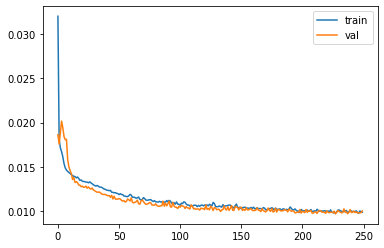

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_14 (Batc (None, 12)                48        
_________________________________________________________________
dense_51 (Dense)             (None, 39)                507       
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 39)                0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 39)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 24)                960       
_________________________________________________________________
leaky_re_lu_52 (LeakyReLU)   (None, 24)                0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 24)               

In [259]:
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(best_params['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model.add(LeakyReLU(alpha= best_params[ 'alpha'])) 
model.add(Dropout(best_params['drop_out1']))
# if best_params['layers'] >=2 :
model.add(Dense(best_params['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model.add(LeakyReLU(alpha=best_params[ 'alpha'])) 
model.add(Dropout(best_params['drop_out1']))
if best_params['layers'] >= 3 :
    model.add(Dense(best_params['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
    model.add(LeakyReLU(alpha=best_params[ 'alpha'])) 
    model.add(Dropout(best_params['drop_out1']))
if best_params['layers'] == 4 :
    model.add(Dense(best_params['num_dense_nodes4'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
    model.add(LeakyReLU(alpha=dbest_params[ 'alpha'])) 
    model.add(Dropout(best_params['drop_out1']))
model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model.add(LeakyReLU(alpha=best_params[ 'alpha'])) 

        # instantiate and compile model
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mse',optimizer=opt)
fn = "gdrive/My Drive/Colab Notebooks/Stations/Trainingg_____CO.ckpt" 
fnn = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer

callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model.fit(x=X_traine, y= y_traine,
                  validation_data=(X_val, y_val),
                  batch_size=int(best_params['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

model.summary()
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [260]:
model_NN = model
model_NN.load_weights(fn)
# precovid_model = 'gdrive/My Drive/Colab Notebooks/east_edmonton_model_CO_precov_GOOG.h5'
precovid_model = 'east_edmonton_model_CO_precov_GOOG'
# model_NN.save('east_edmonton_model_CO_precov_GOOG')
model_NN.save(precovid_model)

INFO:tensorflow:Assets written to: east_edmonton_model_CO_precov_GOOG/assets


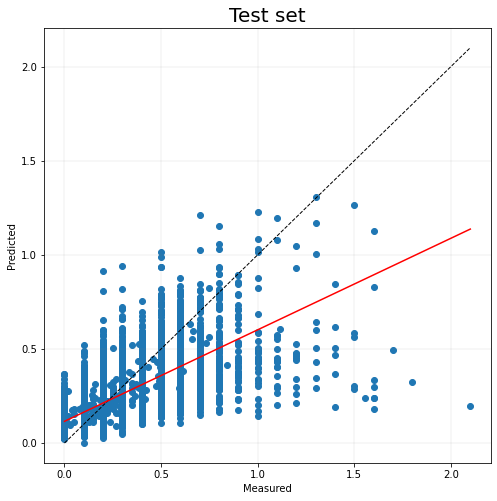

Test Slope : 0.49 X +  0.12
Test RMSE :  0.1
Test R2 :  0.49


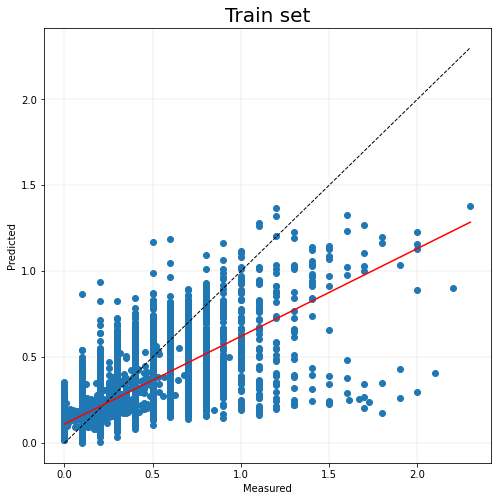

Train Slope : 0.51 X +  0.11
Train RMSE :  0.1
Train R2 :  0.54


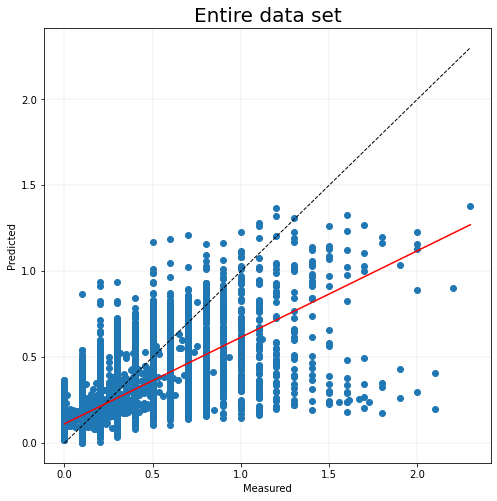

Entire data Slope : 0.5 X +  0.11
Entire data RMSE :  0.1
Entire data R2 :  0.52
97885
97885


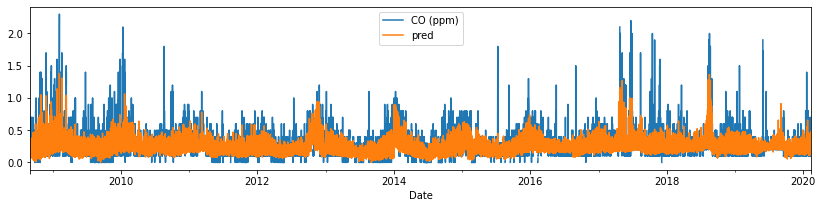

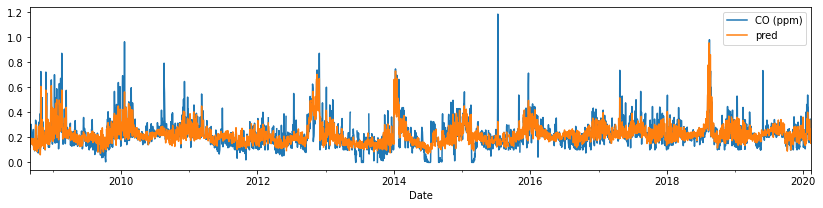

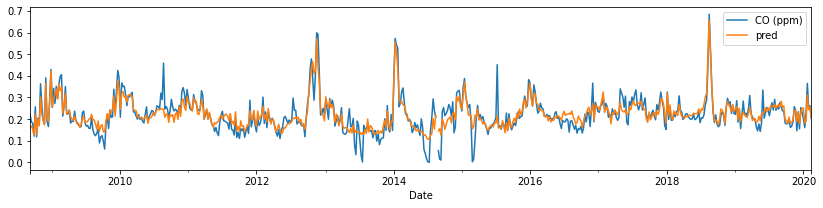

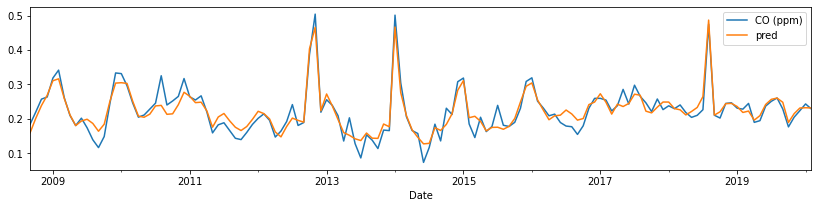

In [261]:
m_plot(df1_w ,X,Y ,model_NN,X_test,X_train,y_train,y_test, (8,8),(14,3))

In [262]:
model = load_model(precovid_model)

In [263]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_14 (Batc (None, 12)                48        
_________________________________________________________________
dense_51 (Dense)             (None, 39)                507       
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 39)                0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 39)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 24)                960       
_________________________________________________________________
leaky_re_lu_52 (LeakyReLU)   (None, 24)                0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 24)               

In [264]:
df2_w

CO (ppm)  T ( C)  ...  parks  work places
Date                                   ...                    
2020-02-15 00:00:00       0.1   -14.8  ...   18.0         -2.0
2020-02-15 01:00:00       0.2   -15.3  ...   18.0         -2.0
2020-02-15 02:00:00       0.1   -15.3  ...   18.0         -2.0
2020-02-15 03:00:00       0.1   -15.4  ...   18.0         -2.0
2020-02-15 04:00:00       0.1   -15.2  ...   18.0         -2.0
...                       ...     ...  ...    ...          ...
2021-04-30 19:00:00       0.1    15.9  ...   38.0        -34.0
2021-04-30 20:00:00       0.2    15.5  ...   38.0        -34.0
2021-04-30 21:00:00       0.2    15.2  ...   38.0        -34.0
2021-04-30 22:00:00       0.1    13.9  ...   38.0        -34.0
2021-04-30 23:00:00       0.1    13.1  ...   38.0        -34.0

[10495 rows x 19 columns]

In [265]:
# df3= df3.copy()
df4 = df1_w.copy()
df4['pred'] = model.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

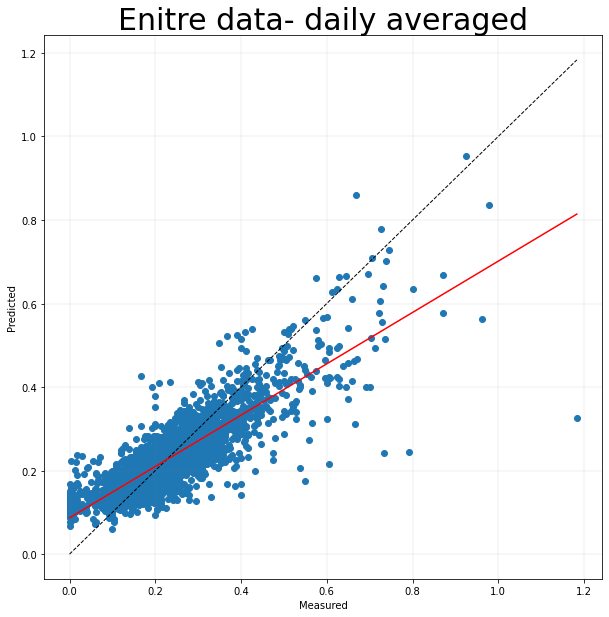

Slope (daily): 0.61 X +  0.09
RMSE (daily): 0.06
R2(daily): 0.69


In [266]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10[aa]).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print('Slope (daily):', round(par[0],2), 'X + ', round(par[1],2))
    print('RMSE (daily):',round(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1))[0],2))
    print('R2(daily):',round(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)),2))
    


In [267]:
preds1 = model.predict(X_train) 
y_real1 = y_train.reshape(-1,1)
y_pred1 = preds1.reshape(-1,1)
print(rmse(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))

[0.0954175]
0.5370449492517069


In [268]:
preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

[0.09886311]
0.4891309916892741


In [269]:
df4.columns

Index(['CO (ppm)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Wind Direction', 'Wind Speed (km/hr)', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'pred'],
      dtype='object')

In [270]:
preds = model.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = [ 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Wind Direction', 'Wind Speed (km/hr)', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]
test_col = [aa]


df1_w_c = df1_w[[ aa, 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Wind Direction', 'Wind Speed (km/hr)', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
        ]]
Y = df1_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2[aa] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 [aa] = y_real2
Test2  ['Prediction'] = y_pred2



# Train2.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/Train_ED_EA_CO_hourly_PRECOV.csv')
# Test2.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/Test_ED_EA_CO_hourly_PRECOV.csv')

[0.0954175]
0.5370449492517069
[0.09886311]
0.4891309916892741


In [271]:
df4.columns

Index(['CO (ppm)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Wind Direction', 'Wind Speed (km/hr)', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'pred'],
      dtype='object')

In [272]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)

In [273]:

df4_D = df4_h.resample('D').mean()
df4_W = df4_h.resample('W').mean()
df4_M = df4_h.resample('M').mean()

# df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/Pred_ED_EA_PRECOV_CO_hourly_.csv')
# df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/Pred_ED_EA_PRECOV_CO_hourly_DailyRE.csv')
# df4_W.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/Pred_ED_EA_PRECOV_CO_hourly_WeeklyRE.csv')
# df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/Pred_ED_EA_PRECOV_CO_hourly_MonthlyRE.csv')

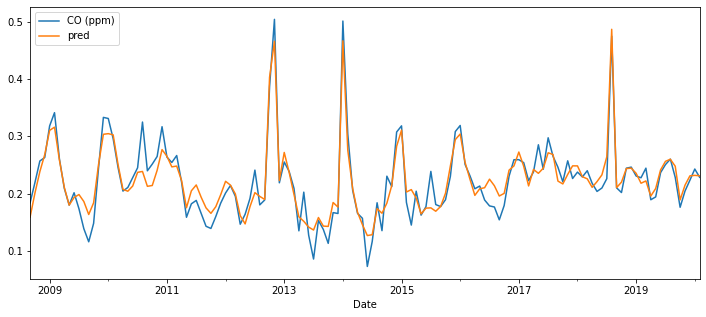

In [274]:
df4_h[aa].resample('M').mean().plot(figsize = (12,5), legend = True)
df4_h['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [275]:
df2_w

CO (ppm)  T ( C)  ...  parks  work places
Date                                   ...                    
2020-02-15 00:00:00       0.1   -14.8  ...   18.0         -2.0
2020-02-15 01:00:00       0.2   -15.3  ...   18.0         -2.0
2020-02-15 02:00:00       0.1   -15.3  ...   18.0         -2.0
2020-02-15 03:00:00       0.1   -15.4  ...   18.0         -2.0
2020-02-15 04:00:00       0.1   -15.2  ...   18.0         -2.0
...                       ...     ...  ...    ...          ...
2021-04-30 19:00:00       0.1    15.9  ...   38.0        -34.0
2021-04-30 20:00:00       0.2    15.5  ...   38.0        -34.0
2021-04-30 21:00:00       0.2    15.2  ...   38.0        -34.0
2021-04-30 22:00:00       0.1    13.9  ...   38.0        -34.0
2021-04-30 23:00:00       0.1    13.1  ...   38.0        -34.0

[10495 rows x 19 columns]

In [276]:
df1_w_c.columns

Index(['CO (ppm)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Wind Direction', 'Wind Speed (km/hr)', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend'],
      dtype='object')

In [277]:
df2_w.columns

Index(['CO (ppm)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Wind Direction', 'Wind Speed (km/hr)', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'driving', 'transit', 'retail & recreation', 'grocery & pharmacy',
       'parks', 'work places'],
      dtype='object')

In [278]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate


df2_w_c = df2_w[[ aa,  'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Wind Direction', 'Wind Speed (km/hr)', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'driving', 'transit', 'retail & recreation', 'grocery & pharmacy',
       'parks', 'work places'
]]
df2_w_c.columns

Index(['CO (ppm)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Wind Direction', 'Wind Speed (km/hr)', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'driving', 'transit', 'retail & recreation', 'grocery & pharmacy',
       'parks', 'work places'],
      dtype='object')

In [279]:
df2.columns

Index(['CO (ppm)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'NOX (ppm)', 'Wind Direction', 'Wind Speed (km/hr)',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'driving', 'driving pred',
       'driving 0', 'driving 0.5', 'driving 1', 'transit', 'transit pred',
       'transit 0', 'transit 0.5', 'transit 1', 'walking', 'walking pred',
       'walking 0', 'walking 0.5', 'walking 1', 'retail & recreation',
       'retail & recreation pred', 'retail & recreation 0',
       'retail & recreation 0.5', 'retail & recreation 1',
       'grocery & pharmacy', 'grocery & pharmacy pred', 'grocery & pharmacy 0',
       'grocery & pharmacy 0.5', 'grocery & pharmacy 1', 'parks', 'parks pred',
       'parks 0', 'parks 0.5', 'parks 1', 'work places', 'work places pred',
       'work places 0', 'work places 0.5', 'work places 1'],
      dtype='object')

In [280]:
mobis = [ 'driving', 
         'transit', 
        #  'walking',
         'retail & recreation', 
         'grocery & pharmacy',
          'parks',
         'work places'
         ]


In [281]:
# mobis = [ 'driving', 'transit', 'retail & recreation pred', 'grocery & pharmacy', 'parks', 'work places']:
# df2_w_c[mobis] = df2_w_c[mobis]/100
# for i in mobis:
#   df2_w_c[i].plot() 


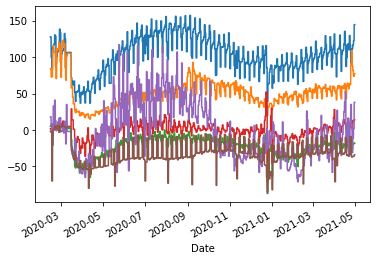

In [282]:
# df2_w_c[mobis]
for i in mobis:
  df2_w_c[i].plot() 

In [283]:
len(mobis)

6

In [284]:
# mobis1

In [285]:
df2_w_c.index

DatetimeIndex(['2020-02-15 00:00:00', '2020-02-15 01:00:00',
               '2020-02-15 02:00:00', '2020-02-15 03:00:00',
               '2020-02-15 04:00:00', '2020-02-15 05:00:00',
               '2020-02-15 06:00:00', '2020-02-15 07:00:00',
               '2020-02-15 08:00:00', '2020-02-15 09:00:00',
               ...
               '2021-04-30 14:00:00', '2021-04-30 15:00:00',
               '2021-04-30 16:00:00', '2021-04-30 17:00:00',
               '2021-04-30 18:00:00', '2021-04-30 19:00:00',
               '2021-04-30 20:00:00', '2021-04-30 21:00:00',
               '2021-04-30 22:00:00', '2021-04-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=10495, freq=None)

In [286]:
Y_a = df2_w_c[aa]
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df2_w_c[['T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Wind Direction', 'Wind Speed (km/hr)', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df2_w_c[ mobis])

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.25, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.25, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 300
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [287]:
print(np.shape(X_a),np.shape(X_b),np.shape(Y_a))

(10495, 12) (10495, 6) (10495, 1)


In [288]:
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

In [289]:
print(np.shape(X_train_a),np.shape(X_train_b))
print(np.shape(X_traine_a),np.shape(X_traine_b))
print(np.shape(X_val_a),np.shape(X_val_b))

(7871, 12) (7871, 6)
(5903, 12) (5903, 6)
(1968, 12) (1968, 6)


In [290]:
best_params

{'alpha': 0.05,
 'batchsize': 2500,
 'drop_out1': 0.010010019531803638,
 'layers': 3,
 'learning_rate': 0.1,
 'num_dense_nodes1': 39,
 'num_dense_nodes2': 24,
 'num_dense_nodes3': 10}

In [291]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_14 (Batc (None, 12)                48        
_________________________________________________________________
dense_51 (Dense)             (None, 39)                507       
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 39)                0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 39)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 24)                960       
_________________________________________________________________
leaky_re_lu_52 (LeakyReLU)   (None, 24)                0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 24)               

In [292]:
class Objective2(object):
    def __init__(self, X_a,X_b, Y, max_epochs, learn_rate_epochs,
                  ):
        self.X_train_a, self.X_test_a, self.y_train_a, self.y_test_a = train_test_split(X_a, Y, test_size=0.001, random_state=42)
        self.X_train_b, self.X_test_b, self.y_train_b, self.y_test_b = train_test_split(X_b, Y, test_size=0.001, random_state=42)

        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs
        # self.n_features = np.shape(self.X_train)[1]
        self.model_fixed = load_model(precovid_model)
        for i in range(0,len(self.model_fixed.layers)):
            self.model_fixed.layers[i].trainable = False

    def __call__(self, trial):        
        dict_params = { 
                        'layer_back' :-(trial.suggest_int('layer_back', 2,4)),
                       'mob_layers' :  trial.suggest_int( 'mob_layers', 1,2),
                        'last_layer': trial.suggest_int('last_layer', 0,1),
                      #  'batchsize': int(trial.suggest_discrete_uniform('batchsize', 500,2000,100)),|
                       'drop_out1': trial.suggest_float('drop_out1',0.0, 0.2),
                       'learning_rate': trial.suggest_float(  'learning_rate',0.001, 0.1),
                       'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 1,6),
                        # 'alpha': trial.suggest_float(  'alpha',0.01, 0.9),
                       }  
                  
        dict_params['alpha'] = 0.1
        dict_params[ 'batchsize'] = 1000

        if dict_params['layer_back'] == -2 or dict_params['layer_back'] == -3 :
           if dict_params['mob_layers'] == 2 :
              dict_params['num_dense_nodes2'] = trial.suggest_int('num_dense_nodes2', 1,3)
              dict_params[ 'drop_out2'] =  trial.suggest_float('drop_out2',0.0, 0.2)
           if  dict_params['last_layer'] == 1 :
               dict_params['num_dense_nodes3'] = trial.suggest_int('num_dense_nodes2', 1,3)
           
         
        if dict_params['layer_back'] == -3 or dict_params['layer_back'] == -4  :
           if dict_params['mob_layers'] == 2 :
              dict_params['num_dense_nodes2'] = trial.suggest_int('num_dense_nodes2', 1,6)
              dict_params[ 'drop_out2'] =  trial.suggest_float('drop_out2',0.0, 0.2)
           if  dict_params['last_layer'] == 1 :
               dict_params['num_dense_nodes3'] = trial.suggest_int('num_dense_nodes3', 1,15)
        
       
        # print(dict_params[ 'layer_back'])
        l1 = Input(shape=(len(mobis),))
        l1_2 = BatchNormalization()(l1)
        l2 = Dense(dict_params['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
        l2_2 = LeakyReLU(alpha=dict_params['alpha'])(l2)

        if dict_params['mob_layers'] ==1:
            merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_2])

        if dict_params['mob_layers'] ==2:
            l2_25= Dropout(dict_params['drop_out2'])(l2_2) 
            l2_3 = Dense(dict_params['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_25 )
            l2_4 = LeakyReLU(alpha=dict_params['alpha'])(l2_3)
            merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_4])

        merged2 = BatchNormalization()(merged)
        l5_0= Dropout(dict_params['drop_out1'])(merged2) 

        if dict_params['last_layer'] ==0:
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_0)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)

        if dict_params['last_layer'] ==1:
            l5 = Dense(dict_params['num_dense_nodes3'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_0)
            l5_1 = LeakyReLU(alpha=dict_params['alpha'])(l5)
            l5_11= Dropout(dict_params['drop_out1'])(l5_1)
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_11)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)          

        model = Model(inputs=[self.model_fixed.input,l1], outputs=l5_3)

        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params['learning_rate'])
        model.compile(loss='mse',optimizer=opt)
        fn2 = "gdrive/My Drive/Colab Notebooks/Stations/East_ED_NOX_apple__houtlky" +str(trial.number) + ".ckpt" 
        fnn2 = os.path.dirname(fn2)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn2, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]
        n_f = 4
        kf = KFold(n_splits=n_f )
        acc = 0 

        for train_index, test_index in kf.split( self.X_train_a):   
                X_tr_a, X_tes_a =  self.X_train_a[train_index],  self.X_train_a[test_index]
                X_tr_b, X_tes_b =  self.X_train_b[train_index],  self.X_train_b[test_index]
                y_tr, y_tes =   self.y_train_a[train_index],   self.y_train_a[test_index]    
                # fit the model
                X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split( X_tr_a,  y_tr, test_size=0.12, random_state = 42)
                X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split( X_tr_b,  y_tr, test_size=0.12, random_state = 42)


                model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=dict_params['batchsize'],
                  epochs=self.max_epochs,
                  shuffle=True, verbose=0,
                  callbacks=callbacks_list)
                
                model.load_weights(fn2)
                preds = model.predict([X_tes_a,X_tes_b]) 
                # print(np.shape(y_tes),np.shape( preds))
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 
        print(acc)
        return acc    

In [113]:
# objective2 = Objective2(X_a, X_b ,Y_a ,maximum_epochs, learning_rate_epochs)
# study2 = optuna.create_study(direction=optimizer_direction, study_name='east_edm___CO___NV___p2',storage='sqlite:///east___edm__CO__NV_p2.db',load_if_exists=True)
# study2.optimize(objective2, n_trials=700)
df_results2 = study2.trials_dataframe()
# df_results2.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/CO_Edmonton_East_Hyperparams_aftervovid_NV_hourly2.csv')
study2.best_trial

FrozenTrial(number=526, values=[0.0030734188127620257], datetime_start=datetime.datetime(2021, 6, 14, 0, 42, 49, 31217), datetime_complete=datetime.datetime(2021, 6, 14, 0, 43, 34, 501058), params={'drop_out1': 0.0002123414591404945, 'last_layer': 1, 'layer_back': 4, 'learning_rate': 0.03169444821864257, 'mob_layers': 1, 'num_dense_nodes1': 6, 'num_dense_nodes3': 15}, distributions={'drop_out1': UniformDistribution(high=0.2, low=0.0), 'last_layer': IntUniformDistribution(high=1, low=0, step=1), 'layer_back': IntUniformDistribution(high=4, low=2, step=1), 'learning_rate': UniformDistribution(high=0.1, low=0.001), 'mob_layers': IntUniformDistribution(high=2, low=1, step=1), 'num_dense_nodes1': IntUniformDistribution(high=6, low=1, step=1), 'num_dense_nodes3': IntUniformDistribution(high=15, low=1, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=530, state=TrialState.COMPLETE, value=None)

In [114]:
study2.best_params

{'drop_out1': 0.0002123414591404945,
 'last_layer': 1,
 'layer_back': 4,
 'learning_rate': 0.03169444821864257,
 'mob_layers': 1,
 'num_dense_nodes1': 6,
 'num_dense_nodes3': 15}

In [293]:
best_params2 ={'drop_out1': 0.0002123414591404945,
 'last_layer': 1,
 'layer_back': 4,
 'learning_rate': 0.03169444821864257,
 'mob_layers': 1,
 'num_dense_nodes1': 6,
 'num_dense_nodes3': 15}

best_params2['layer_back']=-best_params2['layer_back']   
best_params2['alpha'] = 0.1  
best_params2[ 'batchsize'] = 1000         
best_params2

{'alpha': 0.1,
 'batchsize': 1000,
 'drop_out1': 0.0002123414591404945,
 'last_layer': 1,
 'layer_back': -4,
 'learning_rate': 0.03169444821864257,
 'mob_layers': 1,
 'num_dense_nodes1': 6,
 'num_dense_nodes3': 15}

In [294]:
def model_AC (best_params2,X_a,X_b,Y_a):
  

      X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.25, random_state=42)
      X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.25, random_state=42)

      X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
      X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

      maximum_epochs = 300
      early_stop_epochs= 60
      learning_rate_epochs = 30
      optimizer_direction = 'minimize'
      number_of_random_points = 30  # random searches to start opt process
      maximum_time = 8*60*60  # seconds

      model_fixed = load_model(precovid_model)

      for i in range(0,len(model_fixed.layers)):
        model_fixed.layers[i].trainable = False

      l1 = Input(shape=(len(mobis),))
      l1_2 = BatchNormalization()(l1)
      l2 = Dense(best_params2['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
      l2_2 = LeakyReLU(alpha=best_params2['alpha'])(l2)

      if best_params2['mob_layers'] ==1:
          merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_2])

      if best_params2['mob_layers'] ==2:
          l2_25= Dropout(best_paarams2['drop_out2'])(l2_2) 
          l2_3 = Dense(best_params2['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_25 )
          l2_4 = LeakyReLU(alpha=best_params2['alpha'])(l2_3)
          merged = concatenate([self.model_fixed.layers[best_params2[ 'layer_back']].output,l2_4])

      # merged2 = BatchNormalization()(merged)
      l5_0= Dropout(best_params2['drop_out1'])(merged) 

      if best_params2['last_layer'] ==0:
          l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_0)
          l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)

      if best_params2['last_layer'] ==1:
          l5 = Dense(best_params2['num_dense_nodes3'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_0)
          l5_1 = LeakyReLU(alpha=best_params2['alpha'])(l5)
          l5_11= Dropout(best_params2['drop_out1'])(l5_1)
          l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_11)
          l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)          

      model = Model(inputs=[model_fixed.input,l1], outputs=l5_3)


      opt = keras.optimizers.Adam(learning_rate=best_params2['learning_rate'])
      model.compile(loss='mse',optimizer=opt)
      fn_f = "gdrive/My Drive/Colab Notebooks/Stations/Training__CO__aftercovid_hourly.ckpt" 
      fnn_f = os.path.dirname(fn)
      # callbacks for early stopping and for learning rate reducer

      callbacks_list = [
                        #KerasPruningCallback(trial, 'val_loss'),
                        #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                          patience=learning_rate_epochs, 
                                          verbose=0, mode='auto', min_lr=0.000001),
                        tf.keras.callbacks.ModelCheckpoint(filepath=fn_f, save_weights_only=True,
                                        monitor='val_loss',mode='min', save_best_only=True)]

      history = model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                        validation_data=([X_val_a,X_val_b], y_val_a),
                        batch_size=int(best_params2['batchsize']),
                        epochs=maximum_epochs,
                        shuffle=True, verbose=2,
                        callbacks=callbacks_list)
      
      model.load_weights(fn_f )
      pyplot.plot(history.history['loss'], label='train')
      pyplot.plot(history.history['val_loss'], label='val')
      pyplot.legend()
      pyplot.show()

      model.summary()
      plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
      return  model

In [295]:
df2_w_c

CO (ppm)  T ( C)  ...  parks  work places
Date                                   ...                    
2020-02-15 00:00:00       0.1   -14.8  ...   18.0         -2.0
2020-02-15 01:00:00       0.2   -15.3  ...   18.0         -2.0
2020-02-15 02:00:00       0.1   -15.3  ...   18.0         -2.0
2020-02-15 03:00:00       0.1   -15.4  ...   18.0         -2.0
2020-02-15 04:00:00       0.1   -15.2  ...   18.0         -2.0
...                       ...     ...  ...    ...          ...
2021-04-30 19:00:00       0.1    15.9  ...   38.0        -34.0
2021-04-30 20:00:00       0.2    15.5  ...   38.0        -34.0
2021-04-30 21:00:00       0.2    15.2  ...   38.0        -34.0
2021-04-30 22:00:00       0.1    13.9  ...   38.0        -34.0
2021-04-30 23:00:00       0.1    13.1  ...   38.0        -34.0

[10495 rows x 19 columns]

In [299]:
non_moibs = ['T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Wind Direction', 'Wind Speed (km/hr)', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]

In [304]:
mobis = [
 'driving',
 'transit',
 'retail & recreation',
#  'grocery & pharmacy',
 'parks',
 'work places',
 ]


#0.44 0.42 
#parks 0.44 0.45


Epoch 1/300


ValueError: ignored

Epoch 1/300
6/6 - 2s - loss: 0.0206 - val_loss: 0.0052
Epoch 2/300
6/6 - 0s - loss: 0.0076 - val_loss: 0.0052
Epoch 3/300
6/6 - 0s - loss: 0.0057 - val_loss: 0.0053
Epoch 4/300
6/6 - 0s - loss: 0.0052 - val_loss: 0.0051
Epoch 5/300
6/6 - 0s - loss: 0.0050 - val_loss: 0.0045
Epoch 6/300
6/6 - 0s - loss: 0.0048 - val_loss: 0.0042
Epoch 7/300
6/6 - 0s - loss: 0.0046 - val_loss: 0.0041
Epoch 8/300
6/6 - 0s - loss: 0.0044 - val_loss: 0.0041
Epoch 9/300
6/6 - 0s - loss: 0.0043 - val_loss: 0.0041
Epoch 10/300
6/6 - 0s - loss: 0.0042 - val_loss: 0.0039
Epoch 11/300
6/6 - 0s - loss: 0.0041 - val_loss: 0.0038
Epoch 12/300
6/6 - 0s - loss: 0.0040 - val_loss: 0.0038
Epoch 13/300
6/6 - 0s - loss: 0.0040 - val_loss: 0.0037
Epoch 14/300
6/6 - 0s - loss: 0.0040 - val_loss: 0.0037
Epoch 15/300
6/6 - 0s - loss: 0.0040 - val_loss: 0.0037
Epoch 16/300
6/6 - 0s - loss: 0.0039 - val_loss: 0.0036
Epoch 17/300
6/6 - 0s - loss: 0.0040 - val_loss: 0.0036
Epoch 18/300
6/6 - 0s - loss: 0.0040 - val_loss: 0.0036
E

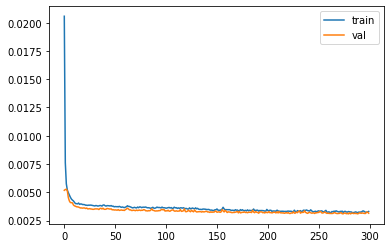

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
batch_normalization_14_input (I [(None, 12)]         0                                            
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 12)           48          batch_normalization_14_input[0][0
__________________________________________________________________________________________________
dense_51 (Dense)                (None, 39)           507         batch_normalization_14[0][0]     
__________________________________________________________________________________________________
leaky_re_lu_51 (LeakyReLU)      (None, 39)           0           dense_51[0][0]                   
____________________________________________________________________________________________

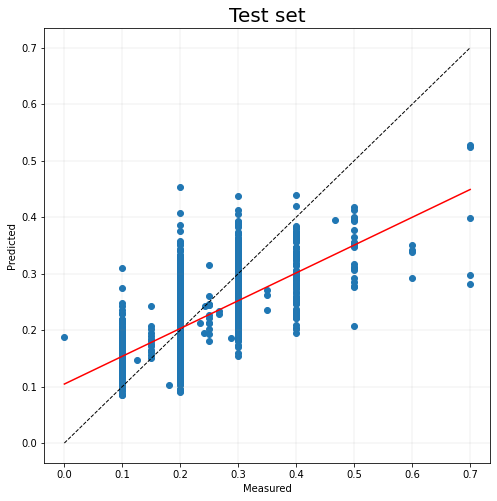

Test Slope : 0.49 X +  0.1
Test RMSE :  0.05
Test R2 :  0.47


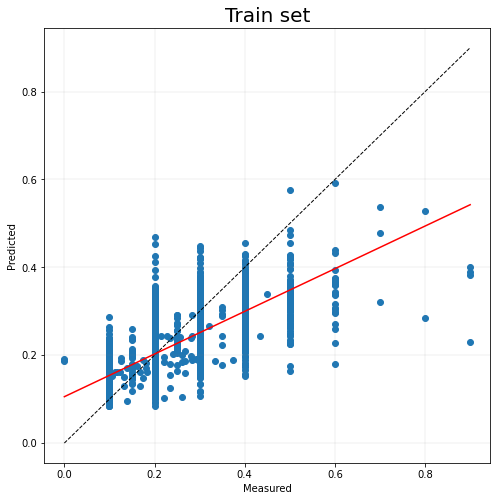

Train Slope : 0.49 X +  0.11
Train RMSE :  0.05
Train R2 :  0.49


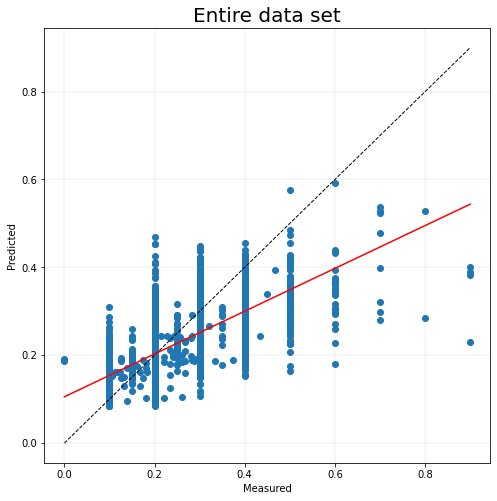

Entire data Slope : 0.49 X +  0.11
Entire data RMSE :  0.05
Entire data R2 :  0.48
2
10495


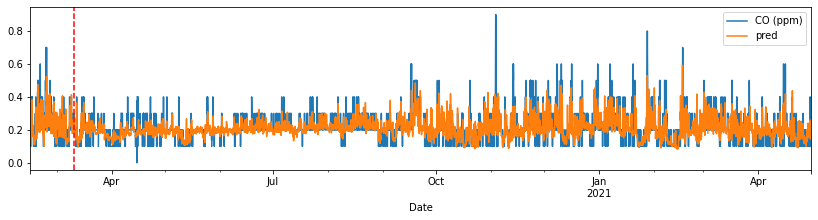

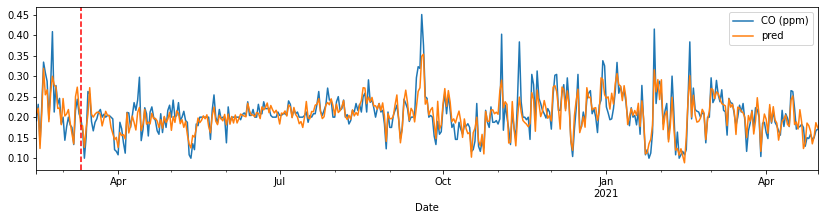

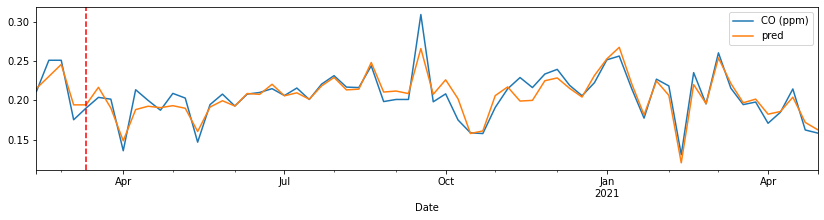

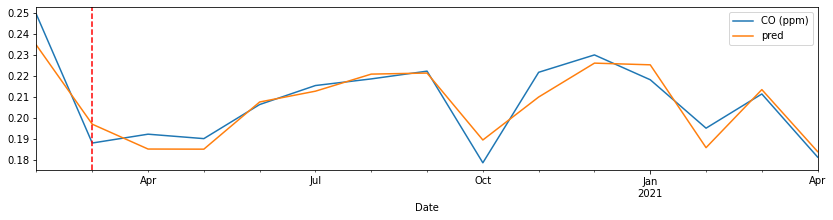

In [305]:
new_feat = [aa] + non_moibs+ mobis
df_model = df2_w_c[new_feat].copy()
Y_a = df_model [aa]
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df_model [non_moibs])
X_b =  np.array(df_model [ mobis])


X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.25, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.25, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)


model_ac = model_AC(best_params2, X_a, X_b, Y_a)
m_plot(df_model,[X_a,X_b],Y_a ,model_ac,[X_test_a,X_test_b],[X_train_a,X_train_b],y_train_a,y_test_a, (8,8),(14,3))

In [ ]:
      # X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.25, random_state=42)
      # X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.25, random_state=42)

      # X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
      # X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

      # maximum_epochs = 300
      # early_stop_epochs= 60
      # learning_rate_epochs = 30
      # optimizer_direction = 'minimize'
      # number_of_random_points = 30  # random searches to start opt process
      # maximum_time = 8*60*60  # seconds

      # model_fixed = load_model(precovid_model)

      # for i in range(0,len(model_fixed.layers)):
      #   model_fixed.layers[i].trainable = False

      # l1 = Input(shape=(len(mobis),))
      # l1_2 = BatchNormalization()(l1)
      # l2 = Dense(best_params2['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
      # l2_2 = LeakyReLU(alpha=best_params2['alpha'])(l2)

      # if best_params2['mob_layers'] ==1:
      #     merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_2])

      # if best_params2['mob_layers'] ==2:
      #     l2_25= Dropout(best_paarams2['drop_out2'])(l2_2) 
      #     l2_3 = Dense(best_params2['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_25 )
      #     l2_4 = LeakyReLU(alpha=best_params2['alpha'])(l2_3)
      #     merged = concatenate([self.model_fixed.layers[best_params2[ 'layer_back']].output,l2_4])

      # # merged2 = BatchNormalization()(merged)
      # l5_0= Dropout(best_params2['drop_out1'])(merged) 

      # if best_params2['last_layer'] ==0:
      #     l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_0)
      #     l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)

      # if best_params2['last_layer'] ==1:
      #     l5 = Dense(best_params2['num_dense_nodes3'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_0)
      #     l5_1 = LeakyReLU(alpha=best_params2['alpha'])(l5)
      #     l5_11= Dropout(best_params2['drop_out1'])(l5_1)
      #     l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_11)
      #     l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)          

      # model = Model(inputs=[model_fixed.input,l1], outputs=l5_3)


      # opt = keras.optimizers.Adam(learning_rate=best_params2['learning_rate'])
      # model.compile(loss='mse',optimizer=opt)
      # fn_f = "gdrive/My Drive/Colab Notebooks/Stations/Training__CO__aftercovid_hourly.ckpt" 
      # fnn_f = os.path.dirname(fn)
      # # callbacks for early stopping and for learning rate reducer

      # callbacks_list = [
      #                   #KerasPruningCallback(trial, 'val_loss'),
      #                   #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
      #                   tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
      #                                     patience=learning_rate_epochs, 
      #                                     verbose=0, mode='auto', min_lr=0.000001),
      #                   tf.keras.callbacks.ModelCheckpoint(filepath=fnn_f, save_weights_only=True,
      #                                   monitor='val_loss',mode='min', save_best_only=True)]

      # history = model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
      #                   validation_data=([X_val_a,X_val_b], y_val_a),
      #                   batch_size=int(best_params2['batchsize']),
      #                   epochs=maximum_epochs,
      #                   shuffle=True, verbose=2,
      #                   callbacks=callbacks_list)
      
      # model.load_weights(fn_f )
      # pyplot.plot(history.history['loss'], label='train')
      # pyplot.plot(history.history['val_loss'], label='val')
      # pyplot.legend()
      # pyplot.show()

      # model.summary()
      # plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [306]:
df2_w_c

CO (ppm)  T ( C)  ...  parks  work places
Date                                   ...                    
2020-02-15 00:00:00       0.1   -14.8  ...   18.0         -2.0
2020-02-15 01:00:00       0.2   -15.3  ...   18.0         -2.0
2020-02-15 02:00:00       0.1   -15.3  ...   18.0         -2.0
2020-02-15 03:00:00       0.1   -15.4  ...   18.0         -2.0
2020-02-15 04:00:00       0.1   -15.2  ...   18.0         -2.0
...                       ...     ...  ...    ...          ...
2021-04-30 19:00:00       0.1    15.9  ...   38.0        -34.0
2021-04-30 20:00:00       0.2    15.5  ...   38.0        -34.0
2021-04-30 21:00:00       0.2    15.2  ...   38.0        -34.0
2021-04-30 22:00:00       0.1    13.9  ...   38.0        -34.0
2021-04-30 23:00:00       0.1    13.1  ...   38.0        -34.0

[10495 rows x 19 columns]

In [307]:
# df3= df3.copy()
df4 = df2_w_c.copy()
df4['pred'] = model_ac.predict([X_a,X_b])
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

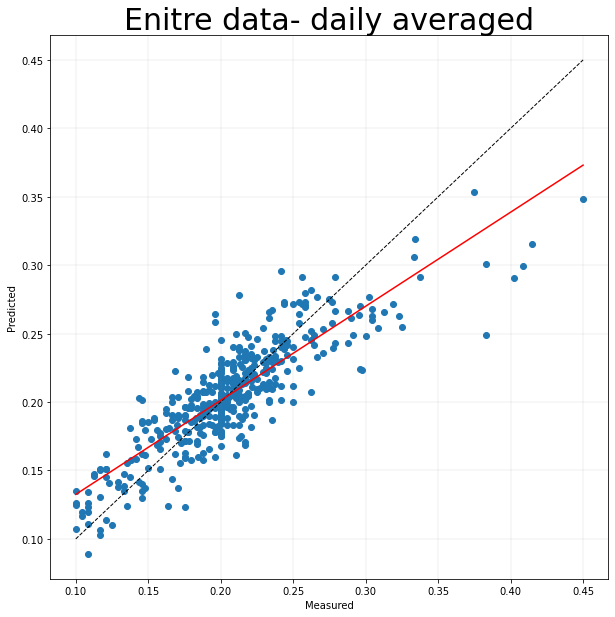

Slope (daily): 0.69 X +  0.06
RMSE (daily): 0.03
R2(daily): 0.73


In [308]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10[aa]).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()


    print('Slope (daily):', round(par[0],2), 'X + ', round(par[1],2))
    print('RMSE (daily):',round(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1))[0],2))
    print('R2(daily):',round(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)),2))
    

In [309]:
df4.columns

Index(['CO (ppm)', 'T ( C)', 'RH %', 'Std. Dev. of Wind Direction',
       'Wind Direction', 'Wind Speed (km/hr)', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',
       'driving', 'transit', 'retail & recreation', 'grocery & pharmacy',
       'parks', 'work places', 'pred'],
      dtype='object')

In [310]:
mobis

['driving', 'transit', 'retail & recreation', 'parks', 'work places']

In [311]:
preds = model_ac.predict([X_train_a,X_train_b]) 
y_real = y_train_a.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model_ac.predict([X_test_a,X_test_b]) 
y_real2 = y_test_a.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = new_feat
test_col = [aa]


Y = df2_w_c[aa]
Y = np.array(Y).reshape(-1,1)
X = np.array(df2_w_c[df2_w_c.columns[1:]])

X_train2, X_test2, y_train2, y_test2 = train_test_split(df2_w_c[train_col], df2_w_c[test_col], test_size=0.25, random_state = 42)
Train2 = X_train2.copy()
Train2[aa] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 [aa] = y_real2
Test2  ['Prediction'] = y_pred2


# Train2.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/Train_ED_EA_CO_hourly_AFTCOV.csv')
# Test2.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/Test_ED_EA_CO_hourly_AFTCOV.csv')

[0.05498011]
0.48747323047524405
[0.05493357]
0.4735618836097427


In [312]:
mobis0=[]
mobis1=[]
mobis0_5=[]

for i in mobis:
  mobis0.append(i + ' 0')
  mobis0_5.append(i + ' 0.5')
  mobis1.append(i + ' 1')

df2[mobis0] = df2[mobis0]
df2[mobis1] = df2[mobis1]
df2[mobis0_5] = df2[mobis0_5]
mobis1

['driving 1', 'transit 1', 'retail & recreation 1', 'parks 1', 'work places 1']

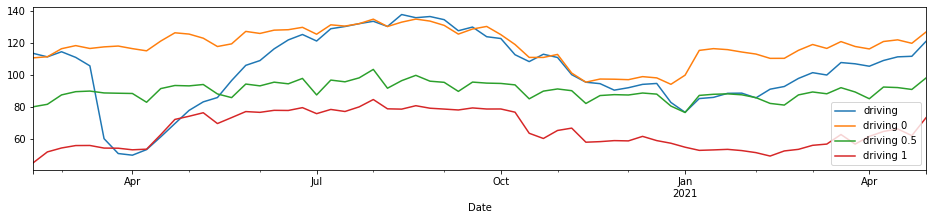

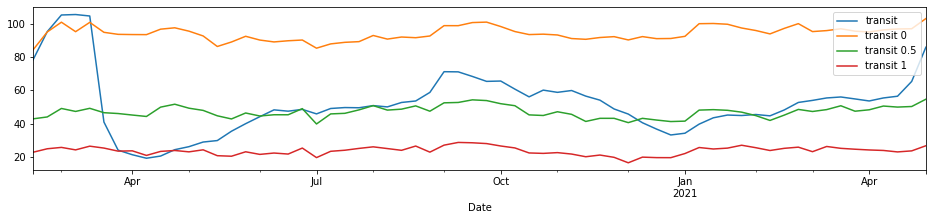

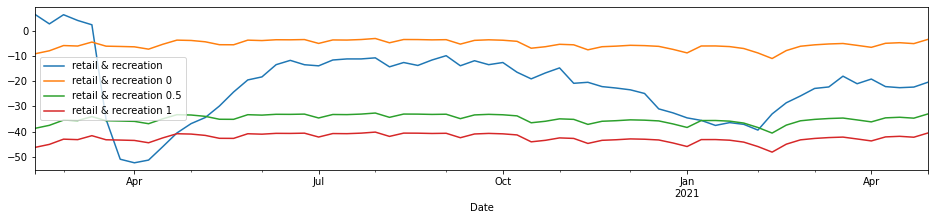

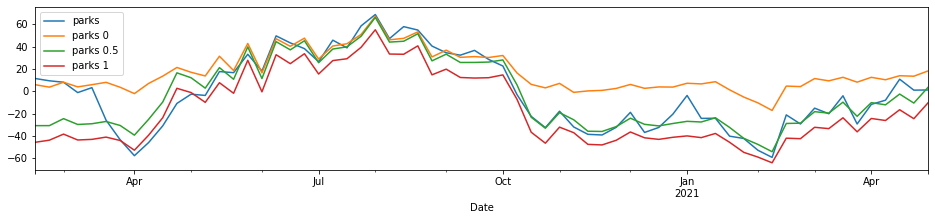

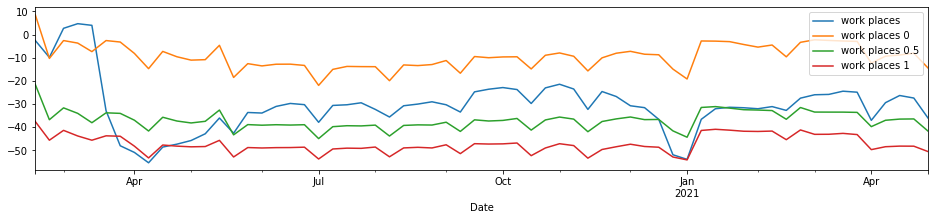

In [313]:
fs = (16,3)
A = 'W'
for i in range (len(mobis)):
    df2[mobis[i]].resample(A).mean().plot(figsize =fs,legend = True) 
    df2[mobis0[i]].resample(A).mean().plot(figsize = fs,legend = True) 
    df2[mobis0_5[i]].resample(A).mean().plot(figsize = fs,legend = True) 
    df2[mobis1[i]].resample(A).mean().plot(figsize =fs,legend = True) 
    plt.show()

In [314]:
new_feat = [aa] + non_moibs+ mobis
df_model = df2_w_c[new_feat].copy()
Y_a = df_model [aa]
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df_model [non_moibs])
X_b =  np.array(df_model [ mobis])

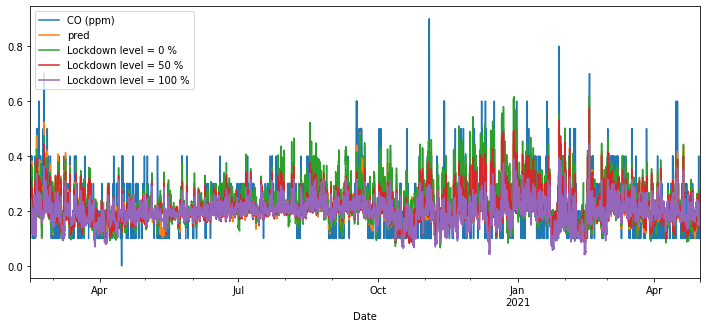

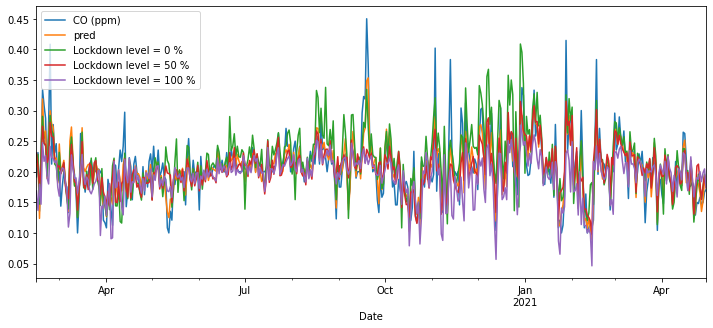

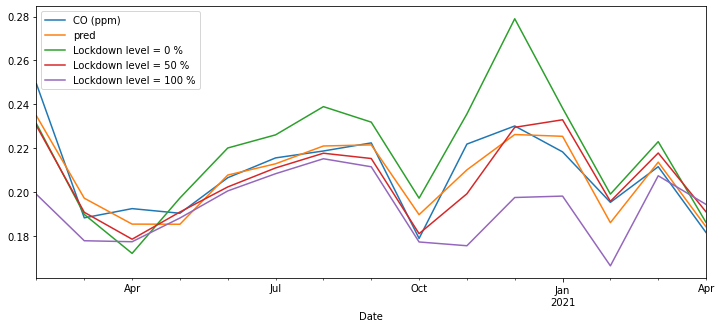

CO (ppm)  CO concentration AVG: 0.2067
pred  CO concentration AVG: 0.206
Lockdown level = 0 %  CO concentration AVG: 0.2176
Lockdown level = 50 %  CO concentration AVG: 0.2049
Lockdown level = 100 %  CO concentration AVG: 0.1929


In [315]:
X_a = np.array(df_model [non_moibs])
X_b0 =  np.array(df2[mobis0])
X_b1 =  np.array(df2[mobis1])
X_b5 =  np.array(df2[mobis0_5])

df44 = df4.copy()
df44['Lockdown level = 0 %'] = model_ac.predict([X_a,X_b0])
df44['Lockdown level = 50 %'] =  model_ac.predict([X_a,X_b5])
df44['Lockdown level = 100 %'] = model_ac.predict([X_a,X_b1])

for i in ['H','D','M']:
  for j in [
            aa, 
            'pred',
            'Lockdown level = 0 %',
            'Lockdown level = 50 %',
            'Lockdown level = 100 %'
            ]:
    df44[j].resample(i).mean().plot(figsize = (12,5), legend = True)
  plt.show()

for m in [
            aa, 
            'pred',
            'Lockdown level = 0 %',
            'Lockdown level = 50 %',
            'Lockdown level = 100 %'
            ]:

            print (m, ' CO concentration AVG:' ,round(df44[m].mean(),4) )


In [324]:
df444 = df44.resample('H').mean().copy()
import plotly.graph_objects as go

# Add data
month = df444.index
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=month, y=df444[aa], name='CO ',
                         line=dict(color='firebrick', width=2)))

fig.add_trace(go.Scatter(x=month, y=df444[ 'pred'], name = 'Prediction',
                         line=dict(color='firebrick', width=2,  dash='dot')))

fig.add_trace(go.Scatter(x=month, y=df444[ 'Lockdown level = 0 %'], name= 'Lockdown level = 0%',
                         line=dict(color='darkgreen', width=3,
                              dash='dash') # dash options include 'dash', 'dot', and 'dashdot'
))
fig.add_trace(go.Scatter(x=month, y=df444[ 'Lockdown level = 50 %'], name='Lockdown level = 50 %',
                         line = dict(color='royalblue', width=3, dash='dash')))


fig.add_trace(go.Scatter(x=month, y=df444[ 'Lockdown level = 100 %'], name='Lockdown level = 100 %',
                         line = dict(color='black', width=3, dash='dash')))
# Edit the layout
fig.update_layout(title='Edmonton East CO concentation',
                   xaxis_title='Date',
                    plot_bgcolor="white",
                   yaxis_title='CO (ppm)',
                   font=dict(family='Arial',
                                        size=24,
                                        color='rgb(0,0,0)')
)



fig.show()


In [325]:
df444 = df44.resample('D').mean().copy()
import plotly.graph_objects as go

# Add data
month = df444.index
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=month, y=df444[aa], name='CO ',
                         line=dict(color='firebrick', width=2)))

fig.add_trace(go.Scatter(x=month, y=df444[ 'pred'], name = 'Prediction',
                         line=dict(color='firebrick', width=2,  dash='dot')))

fig.add_trace(go.Scatter(x=month, y=df444[ 'Lockdown level = 0 %'], name= 'Lockdown level = 0%',
                         line=dict(color='darkgreen', width=3,
                              dash='dash') # dash options include 'dash', 'dot', and 'dashdot'
))
fig.add_trace(go.Scatter(x=month, y=df444[ 'Lockdown level = 50 %'], name='Lockdown level = 50 %',
                         line = dict(color='royalblue', width=3, dash='dash')))


fig.add_trace(go.Scatter(x=month, y=df444[ 'Lockdown level = 100 %'], name='Lockdown level = 100 %',
                         line = dict(color='black', width=3, dash='dash')))
# Edit the layout
fig.update_layout(title='Edmonton East CO concentation',
                   xaxis_title='Date',
                    plot_bgcolor="white",
                   yaxis_title='CO (ppm)',
                   font=dict(family='Arial',
                                        size=24,
                                        color='rgb(0,0,0)')
)



fig.show()


In [326]:
df444 = df44.resample('W').mean().copy()
import plotly.graph_objects as go

# Add data
month = df444.index
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=month, y=df444[aa], name='CO ',
                         line=dict(color='firebrick', width=2)))

fig.add_trace(go.Scatter(x=month, y=df444[ 'pred'], name = 'Prediction',
                         line=dict(color='firebrick', width=2,  dash='dot')))

fig.add_trace(go.Scatter(x=month, y=df444[ 'Lockdown level = 0 %'], name= 'Lockdown level = 0%',
                         line=dict(color='darkgreen', width=3,
                              dash='dash') # dash options include 'dash', 'dot', and 'dashdot'
))
fig.add_trace(go.Scatter(x=month, y=df444[ 'Lockdown level = 50 %'], name='Lockdown level = 50 %',
                         line = dict(color='royalblue', width=3, dash='dash')))


fig.add_trace(go.Scatter(x=month, y=df444[ 'Lockdown level = 100 %'], name='Lockdown level = 100 %',
                         line = dict(color='black', width=3, dash='dash')))
# Edit the layout
fig.update_layout(title='Edmonton East CO concentation',
                   xaxis_title='Date',
                    plot_bgcolor="white",
                   yaxis_title='CO (ppm)',
                   font=dict(family='Arial',
                                        size=24,
                                        color='rgb(0,0,0)')
)



fig.show()


In [327]:
df444 = df44.resample('M').mean().copy()
import plotly.graph_objects as go

# Add data
month = df444.index
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=month, y=df444[aa], name='CO ',
                         line=dict(color='firebrick', width=2)))

fig.add_trace(go.Scatter(x=month, y=df444[ 'pred'], name = 'Prediction',
                         line=dict(color='firebrick', width=2,  dash='dot')))

fig.add_trace(go.Scatter(x=month, y=df444[ 'Lockdown level = 0 %'], name= 'Lockdown level = 0%',
                         line=dict(color='darkgreen', width=3,
                              dash='dash') # dash options include 'dash', 'dot', and 'dashdot'
))
fig.add_trace(go.Scatter(x=month, y=df444[ 'Lockdown level = 50 %'], name='Lockdown level = 50 %',
                         line = dict(color='royalblue', width=3, dash='dash')))


fig.add_trace(go.Scatter(x=month, y=df444[ 'Lockdown level = 100 %'], name='Lockdown level = 100 %',
                         line = dict(color='black', width=3, dash='dash')))
# Edit the layout
fig.update_layout(title='Edmonton East CO concentation',
                   xaxis_title='Date',
                    plot_bgcolor="white",
                   yaxis_title='CO (ppm)',
                   font=dict(family='Arial',
                                        size=24,
                                        color='rgb(0,0,0)')
)



fig.show()


In [321]:
# df444_D = df444.resample('D').mean()
# df444_W = df444.resample('W').mean()
# df444_M = df444.resample('M').mean()

# df444.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/Pred_ED_EA_AFTCOV_CO_hourly_.csv')
# df444_D.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/Pred_ED_EA_AFTCOV_CO_hourly_DailyRE.csv')
# df444_W.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/Pred_ED_EA_AFTCOV_CO_hourly_WeeklyRE.csv')
# df444_M.to_csv('gdrive/My Drive/Colab Notebooks/Alberta/ED_2021_jun/Edmonton_East_CO_hourly/Pred_ED_EA_AFTCOV_CO_hourly_MonthlyRE.csv')